# Preprocessing 🧹

### Import potrzebnych bibliotek

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.cluster import DBSCAN

### Załadowanie pliku i stworzenie z danych DataFrame

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Loan_data.csv to Loan_data (1).csv


In [ ]:
df = pd.read_csv('Loan_data.csv')
df.head(1)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,1077501,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


### Sprawdzam informacje na temat pliku
- kształt
- braki
- ogólne informacje

In [ ]:
df.shape

(42536, 151)

In [ ]:
df.isnull().sum()

id                           0
member_id                42536
loan_amnt                    1
funded_amnt                  1
funded_amnt_inv              1
                         ...  
settlement_status        42376
settlement_date          42376
settlement_amount        42376
settlement_percentage    42376
settlement_term          42376
Length: 151, dtype: int64

In [ ]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,42535.000000,42506.000000,42535.000000,42535.000000,42506.000000,15609.000000,3651.000000,42506.000000,42506.000000,4.253500e+04,42506.000000,42535.0,42535.0,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42390.0,0.0,42535.0,0.0,0.0,0.0,42506.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,41170.000000,42430.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.000000,160.000000,160.000000
mean,NaN,11089.722581,10821.585753,10139.938785,322.623063,6.913656e+04,13.373043,0.152449,713.052545,717.052545,1.081424,35.017618,59.175568,9.343951,0.058156,1.429786e+04,22.124406,0.0,0.0,12020.189644,11312.729377,9675.675936,2239.981444,1.516890,103.015467,14.387843,2613.245652,689.922511,676.952039,0.0,NaN,1.0,NaN,NaN,NaN,0.000094,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.045227,0.000024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4272.137875,49.905875,1.200000
std,NaN,7410.938391,7146.914675,7131.598014,208.927216,6.409635e+04,6.726315,0.512406,36.188439,36.188439,1.527455,22.418427,47.145396,4.496274,0.245713,2.201844e+04,11.592811,0.0,0.0,9094.685888,9038.506549,7105.750304,2585.057393,7.830064,735.799086,162.177837,4385.066535,80.818099,119.647752,0.0,NaN,0.0,NaN,NaN,NaN,0.009700,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.208737,0.004855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3119.373774,15.563690,4.085255
min,NaN,500.000000,500.000000,0.000000,15.670000,1.896000e+03,0.000000,0.000000,610.000000,614.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193.290000,10.690000,0.000000
25%,NaN,5200.000000,5000.000000,4950.000000,165.520000,4.000000e+04,8.200000,0.000000,685.000000,689.000000,0.000000,17.000000,0.000000,6.000000,0.000000,3.635000e+03,13.000000,0.0,0.0,5465.685189,4793.115000,4400.000000,657.100000,0.000000,0.000000,0.000000,211.050000,644.000000,640.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN

In [ ]:
empties =df.isnull().sum().sort_values(ascending=False)
percent_empty = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
all_empties = pd.concat([empties, percent_empty*100], axis=1, keys=['empties', 'percent_empty'])
all_empties.T

,inq_fi,mths_since_recent_bc,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,mths_since_recent_bc_dlq,mort_acc,total_bal_il,mo_sin_rcnt_tl,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,mths_since_rcnt_il,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,open_il_24m,open_il_12m,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,...,total_rec_late_fee,disbursement_method,url,pymnt_plan,loan_status,issue_d,verification_status,home_ownership,hardship_flag,sub_grade,grade,installment,int_rate,term,funded_amnt_inv,funded_amnt,loan_amnt,purpose,zip_code,total_rec_int,revol_bal,total_rec_prncp,total_pymnt_inv,total_pymnt,out_prncp_inv,out_prncp,initial_list_status,recoveries,collection_recovery_fee,last_pymnt_amnt,addr_state,last_fico_range_high,last_fico_range_low,policy_code,fico_range_high,fico_range_low,application_type,debt_settlement_flag,dti,id
empties,42536.0,42536.0,42536.0,42536.0,42536.0,42536.0,42536.0,42536.0,42536.0,42536.0,42536.0,42536.0,42536.0,42536.0,42536.0,42536.0,42536.0,42536.0,42536.0,42536.0,42536.0,42536.0,42536.0,42536.0,42536.0,42536.0,42536.0,42536.0,42536.0,42536.0,42536.0,42536.0,42536.0,42536.0,42536.0,42536.0,42536.0,42536.0,42536.0,42536.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0
percent_empty,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,0.002351,0.002351,0.002351,0.002351,0.002351,0.002351,0.002351,0.002351,0.002351,0.002351,0.002351,0.002351,0.002351,0.002351,0.002351,0.002351,0.002351,0.002351,0.002351,0.002351,0.002351,0.002351,0.002351,0.002351,0.002351,0.002351,0.002351,0.002351,0.002351,0.002351,0.002351,0.002351,0.002351,0.002351,0.002351,0.002351,0.002351,0.002351,0.002351,0.0


Na podstawie powyższych informacji widać, że mamy wiele kolumn, które nie zawierają żadnych danych oraz takie, które zaiwerają tylko jedną zmienną (np. tylko 0) a zatem nie wniosą one nic do moich badań i mogą zostać usunięte. Zacznę jednak od usunięcia kolumny "id", która nie będziemi potrzebna ze względu na dodaną przez Pandas kolumnę z indeksem, następnie usunę wiersze, które zawierają same braki oraz kolumny, które zawierają ponad 20% braków, gdyż przy tak potężnym zbiorze jest to znaczna ilość danych, którą trudno będzie uzupełnić

In [ ]:
df.drop('id', axis=1, inplace = True)
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1014.530000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,NaN,NaN,2.0,0.0,2956.0,98.5%,10.0,f,0.0,0.0,3005.666844,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,690.0,694.0,1.0,35.0,NaN,10.0,0.0,5598.0,21%,37.0,f,0.0,0.0,12231.890000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,695.0,699.0,0.0,38.0,NaN,15.0,0.0,27783.0,53.9%,38.0,f,0.0,0.0,4066.908161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.dropna(axis=0, how='all')
df.shape

(42535, 150)

In [ ]:
df = df.dropna(axis=1, thresh=0.8*len(df))
df.shape

(42535, 58)

In [ ]:
df.describe(include='all')

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag
count,42535.000000,42535.000000,42535.000000,42535,42535,42535.000000,42535,42535,39909,41423,42535,4.253100e+04,42535,42535,42535,42535,42535,42535,42522,42535,42535,42535.000000,42506.000000,42506,42535.000000,42535.000000,42506.000000,42506.000000,42506.000000,4.253500e+04,42445,42506.000000,42535,42535.0,42535.0,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42452,42535.000000,42531,42535.000000,42535.000000,42390.0,42535.0,42535,42506.000000,42390.0,42506.000000,41170.000000,42430.000000,42535,42535,42535
unique,NaN,NaN,NaN,2,394,NaN,7,35,30658,11,5,NaN,3,55,4,1,42535,14,21264,837,50,NaN,NaN,530,NaN,NaN,NaN,NaN,NaN,NaN,1119,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112,NaN,133,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,1,1,2
top,NaN,NaN,NaN,36 months,10.99%,NaN,B,B3,US Army,10+ years,RENT,NaN,Not Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt Consolidation,100xx,CA,NaN,NaN,Oct-1999,NaN,NaN,NaN,NaN,NaN,NaN,0%,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mar-2013,NaN,Aug-2018,NaN,NaN,NaN,NaN,Individual,NaN,NaN,NaN,NaN,NaN,N,Cash,N
freq,NaN,NaN,NaN,31534,970,NaN,12389,2997,139,9369,20181,NaN,18758,2267,34116,42535,1,19776,2259,649,7429,NaN,NaN,393,NaN,NaN,NaN,NaN,NaN,NaN,1070,NaN,42535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1070,NaN,9248,NaN,NaN,NaN,NaN,42535,NaN,NaN,NaN,NaN,NaN,42535,42535,42375
mean,11089.722581,10821.585753,10139.938785,NaN,NaN,322.623063,NaN,NaN,NaN,NaN,NaN,6.913656e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.373043,0.152449,NaN,713.052545,717.052545,1.081424,9.343951,0.058156,1.429786e+04,NaN,22.124406,NaN,0.0,0.0,12020.189644,11312.729377,9675.675936,2239.981444,1.516890,103.015467,14.387843,NaN,2613.245652,NaN,689.922511,676.952039,0.0,1.0,NaN,0.000094,0.0,0.143039,0.045227,0.000024,NaN,NaN,NaN
std,7410.938391,7146.914675,7131.598014,NaN,NaN,208.927216,NaN,NaN,NaN,NaN,NaN,6.409635e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.726315,0.512406,NaN,36.188439,36.188439,1.527455,4.496274,0.245713,2.201844e+04,NaN,11.592811,NaN,0.0,0.0,9094.685888,9038.506549,7105.750304,2585.057393,7.830064,735.799086,162.177837,NaN,4385.066535,NaN,80.818099,119.647752,0.0,0.0,NaN,0.009700,0.0,29.359579,0.208737,0.004855,NaN,NaN,NaN
min,500.000000,500.000000,0.000000,NaN,NaN,15.670000,NaN,NaN,NaN,NaN,NaN,1.896000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,610.000000,614.000000,0.000000,1.000000,0.000000,0.000000e+00,NaN,1.000000,NaN,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.0,1.0,NaN,0.000000,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,5200.000000,5000.000000,4950.000000,NaN,NaN,165.520000,NaN,NaN,NaN,NaN,NaN,4.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.200000,0.000000,NaN,685.000000,689.000000,0.000000,6.000000,0.000000,3.635000e+03,NaN,13.000000,NaN,0.0,0.0,5465.685189,4793.115000,4400.000000,657.100000,0.000000,0.000000,0.000000,NaN,211.050000,NaN,644.000000,640.000000,0.0,1.0,NaN,0.000000,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,9700.000000,9600.000000,8500.000000,NaN,NaN,277.690000,NaN,NaN,NaN,NaN,NaN,5.900000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.470000,0.000000

Po ponownej analizie widać, że zostało jeszcze kilka kolumn, które zawierają tę samą wartość w każdym wierszu - tekstową lub numeryczną i które nic nie wnoszą. Usuwam także kilka kolumn, które wydają mi się całkiem zbędne w procesie analizy, jak choćby url.

- kolumny z unikalną tylko jedną warością:

In [ ]:
df = df.drop(axis=1, columns=['pymnt_plan','application_type','hardship_flag','disbursement_method','initial_list_status','chargeoff_within_12_mths',
                              'policy_code','collections_12_mths_ex_med','out_prncp_inv','out_prncp'])
df.shape

(42535, 48)

- kolumny nieistotne dla analizy:

In [ ]:
df = df.drop(axis=1, columns=['url','title','zip_code','addr_state','earliest_cr_line'])
df.shape

(42535, 43)

- kolumny z informacjami "z przyszłości"

In [ ]:
df = df.drop(axis=1, columns=['total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee',
                              'recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','delinq_amnt', 'last_fico_range_low', 'last_fico_range_high', 'issue_d'])
df.shape

(42535, 29)

Sprawdzam informacje na temat danych zawartych w df oraz ilość brakujących wartości po usunięciu kolumn:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42535 entries, 0 to 42535
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             42535 non-null  float64
 1   funded_amnt           42535 non-null  float64
 2   funded_amnt_inv       42535 non-null  float64
 3   term                  42535 non-null  object 
 4   int_rate              42535 non-null  object 
 5   installment           42535 non-null  float64
 6   grade                 42535 non-null  object 
 7   sub_grade             42535 non-null  object 
 8   emp_title             39909 non-null  object 
 9   emp_length            41423 non-null  object 
 10  home_ownership        42535 non-null  object 
 11  annual_inc            42531 non-null  float64
 12  verification_status   42535 non-null  object 
 13  loan_status           42535 non-null  object 
 14  purpose               42535 non-null  object 
 15  dti                

In [ ]:
df.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title               2626
emp_length              1112
home_ownership             0
annual_inc                 4
verification_status        0
loan_status                0
purpose                    0
dti                        0
delinq_2yrs               29
fico_range_low             0
fico_range_high            0
inq_last_6mths            29
open_acc                  29
pub_rec                   29
revol_bal                  0
revol_util                90
total_acc                 29
acc_now_delinq            29
pub_rec_bankruptcies    1365
tax_liens                105
debt_settlement_flag       0
dtype: int64

Widać wyraźnie, że część kolumn zawiera dokładnie taką samą ilość brakujących wartości - 29 - chcę sprawdzić, czy to są te same wiersze w każdym przypadku

In [ ]:
null_columns = df[(df['open_acc'].isna())]
null_columns.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,pub_rec_bankruptcies,tax_liens,debt_settlement_flag
42450,5000.0,5000.0,3025.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,NONE,NaN,Not Verified,Does not meet the credit policy. Status:Fully ...,other,1.0,NaN,800.0,804.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,N
42451,7000.0,7000.0,3450.0,36 months,7.75%,218.55,A,A3,NaN,< 1 year,NONE,NaN,Not Verified,Does not meet the credit policy. Status:Fully ...,other,1.0,NaN,800.0,804.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,N
42460,4350.0,4350.0,825.0,36 months,8.07%,136.45,A,A4,NaN,< 1 year,RENT,120000.0,Not Verified,Does not meet the credit policy. Status:Fully ...,other,4.0,NaN,740.0,744.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,N
42473,3900.0,3900.0,2025.0,36 months,9.33%,124.62,B,B3,NaN,< 1 year,RENT,98000.0,Not Verified,Does not meet the credit policy. Status:Fully ...,other,10.0,NaN,705.0,709.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,N
42481,6700.0,6700.0,6700.0,36 months,7.75%,209.18,A,A3,NaN,< 1 year,NONE,NaN,Not Verified,Does not meet the credit policy. Status:Fully ...,other,1.0,NaN,800.0,804.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,N


In [ ]:
null_columns.shape

(29, 29)

In [ ]:
null_records = pd.DataFrame(df.isnull().any(), columns=['Nulls'])
null_records['Global_nulls'] = pd.DataFrame(df.isnull().sum())
null_records['Column_nulls'] = pd.DataFrame(null_columns.isna().sum())
print(null_records)

                      Nulls  Global_nulls  Column_nulls
loan_amnt             False             0             0
funded_amnt           False             0             0
funded_amnt_inv       False             0             0
term                  False             0             0
int_rate              False             0             0
installment           False             0             0
grade                 False             0             0
sub_grade             False             0             0
emp_title              True          2626            12
emp_length             True          1112             0
home_ownership        False             0             0
annual_inc             True             4             4
verification_status   False             0             0
loan_status           False             0             0
purpose               False             0             0
dti                   False             0             0
delinq_2yrs            True            29       

Wyraźnie widać, że w kolumnach z brakami w ilości 29 faktycznie pokrywają się te same wiersze. Można je zatem usunąć bez straty istotnych danych dla mojej dalszej analizy

In [ ]:
df.dropna(subset=['open_acc'], inplace=True)
df.isna().sum()
df.shape

(42506, 29)

Są dwie kolumny, które mimo, że zawierają informacje w formie liczbowej, to mają typ object ze względu na znak %. Pozbywam się zatem tego znaku i zmieniam typ na float

---



In [ ]:
df.int_rate = df.int_rate.str.rstrip('%')

In [ ]:
df.revol_util = df.revol_util.str.rstrip('%')

In [ ]:
for col in ['int_rate', 'revol_util']:
    df[col] = df[col].astype('float64')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42506 entries, 0 to 42514
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             42506 non-null  float64
 1   funded_amnt           42506 non-null  float64
 2   funded_amnt_inv       42506 non-null  float64
 3   term                  42506 non-null  object 
 4   int_rate              42506 non-null  float64
 5   installment           42506 non-null  float64
 6   grade                 42506 non-null  object 
 7   sub_grade             42506 non-null  object 
 8   emp_title             39892 non-null  object 
 9   emp_length            41394 non-null  object 
 10  home_ownership        42506 non-null  object 
 11  annual_inc            42506 non-null  float64
 12  verification_status   42506 non-null  object 
 13  loan_status           42506 non-null  object 
 14  purpose               42506 non-null  object 
 15  dti                

Sprawdzam, jak wygląda kolumna targetowa loan_status

In [ ]:
df.loan_status.unique()

array(['Fully Paid', 'Charged Off',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [ ]:
df['loan_status'] = df['loan_status'].astype('category')

In [ ]:
df[(df['loan_status'] == 'Does not meet the credit policy. Status:Charged Off')].count().loan_status

758

In [ ]:
df.replace(to_replace='Does not meet the credit policy. Status:Charged Off', value='Charged Off', inplace=True)
df.loan_status.unique()

['Fully Paid', 'Charged Off', 'Does not meet the credit policy. Status:Fully...]
Categories (3, object): ['Fully Paid', 'Charged Off',
                         'Does not meet the credit policy. Status:Fully...]

In [ ]:
df[(df['loan_status'] == 'Does not meet the credit policy. Status:Fully Paid')].count().loan_status

1962

In [ ]:
df.replace(to_replace='Does not meet the credit policy. Status:Fully Paid', value='Fully Paid', inplace=True)
df.loan_status.unique()

['Fully Paid', 'Charged Off']
Categories (2, object): ['Fully Paid', 'Charged Off']

In [ ]:
df.loan_status.isna().sum()

0

In [ ]:
df.loan_status.value_counts()

Fully Paid     36078
Charged Off     6428
Name: loan_status, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


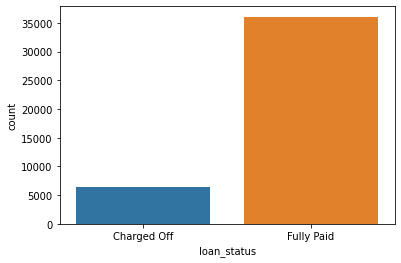

In [ ]:
sns.countplot(df.loan_status)

Kolumnę targetową "loan_status" zmieniam tak, aby znalazły się niej wartości liczbowe zamiast opisu słownego

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['loan_status'] = le.fit_transform(df['loan_status'])

In [ ]:
df.loan_status.dtype

dtype('int64')

In [ ]:
df.loan_status.value_counts()

1    36078
0     6428
Name: loan_status, dtype: int64

Teraz przyjrzę się szczegółowo brakom w zestawie danych, które pozostały po dokonaniu wstępnego czyszczenia

In [ ]:
nulls_summary = pd.DataFrame(df.isnull().any(), columns=['Nulls'])
nulls_summary['Num_of_nulls'] = pd.DataFrame(df.isnull().sum())
nulls_summary['Num_of_nulls [%]'] = round((df.isnull().mean()*100),2)
print(nulls_summary)

                      Nulls  Num_of_nulls  Num_of_nulls [%]
loan_amnt             False             0              0.00
funded_amnt           False             0              0.00
funded_amnt_inv       False             0              0.00
term                  False             0              0.00
int_rate              False             0              0.00
installment           False             0              0.00
grade                 False             0              0.00
sub_grade             False             0              0.00
emp_title              True          2614              6.15
emp_length             True          1112              2.62
home_ownership        False             0              0.00
annual_inc            False             0              0.00
verification_status   False             0              0.00
loan_status           False             0              0.00
purpose               False             0              0.00
dti                   False             

In [ ]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,pub_rec_bankruptcies,tax_liens,debt_settlement_flag
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,1,credit_card,27.65,0.0,735.0,739.0,1.0,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,0.0,N
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,0,car,1.00,0.0,740.0,744.0,5.0,3.0,0.0,1687.0,9.4,4.0,0.0,0.0,0.0,N
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,1,small_business,8.72,0.0,735.0,739.0,2.0,2.0,0.0,2956.0,98.5,10.0,0.0,0.0,0.0,N
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,1,other,20.00,0.0,690.0,694.0,1.0,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,0.0,N
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,1,other,17.94,0.0,695.0,699.0,0.0,15.0,0.0,27783.0,53.9,38.0,0.0,0.0,0.0,N


In [ ]:
df.dtypes.value_counts()

float64    19
object      9
int64       1
dtype: int64

Zbadam jeszcze każdą z 9 kolumn zawierających zmienne kategoryczne

---



In [ ]:
# 1
df.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


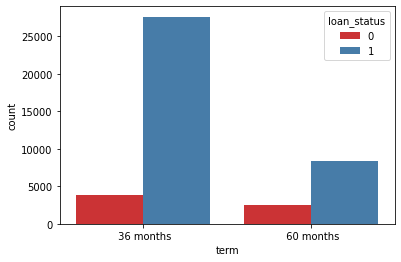

In [ ]:
sns.countplot(df['term'], hue=df['loan_status'], palette='Set1')

In [ ]:
df.term.isna().sum()

0

In [ ]:
#2
df.grade.unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


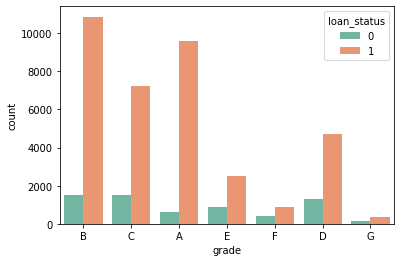

In [ ]:
sns.countplot(df['grade'], hue=df['loan_status'], palette='Set2')

In [ ]:
df.grade.isna().sum()

0

In [ ]:
#3
df.sub_grade.unique()

array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


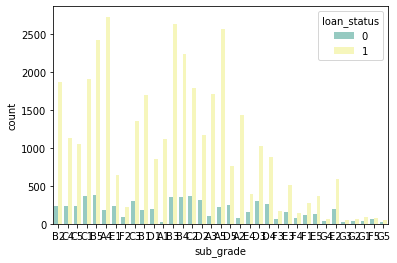

In [ ]:
sns.countplot(df['sub_grade'], hue=df['loan_status'], palette='Set3')

In [ ]:
df.sub_grade.isna().sum()

0

In [ ]:
#4
df['emp_title'].nunique()

30644

In [ ]:
df.emp_title.value_counts()

US Army                        139
Bank of America                115
IBM                             72
AT&T                            61
Kaiser Permanente               61
                              ... 
Miltiadis Leptourgos, P.E.       1
Allogram                         1
Knight transportation            1
Cameron Parish School Board      1
Agnew Rincon Architects          1
Name: emp_title, Length: 30644, dtype: int64

In [ ]:
df.emp_title.isna().sum()

2614

In [ ]:
#5
df.emp_length.nunique()

11

In [ ]:
df.emp_length.value_counts()

10+ years    9366
< 1 year     5044
2 years      4742
3 years      4362
4 years      3649
1 year       3592
5 years      3458
6 years      2374
7 years      1875
8 years      1592
9 years      1340
Name: emp_length, dtype: int64

In [ ]:
df.emp_length.isna().sum()

1112

In [ ]:
#6
df.home_ownership.nunique()

5

In [ ]:
df.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [ ]:
df.home_ownership.isna().sum()

0

In [ ]:
df.home_ownership.value_counts()

RENT        20164
MORTGAGE    18952
OWN          3250
OTHER         136
NONE            4
Name: home_ownership, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


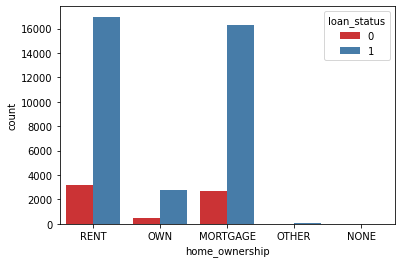

In [ ]:
sns.countplot(df['home_ownership'], hue=df['loan_status'], palette='Set1')

In [ ]:
df[(df['home_ownership']=='RENT') & (df['loan_status']=='Charged Off')].count().loan_status

0

In [ ]:
#7
df.verification_status.nunique()

3

In [ ]:
df.verification_status.unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


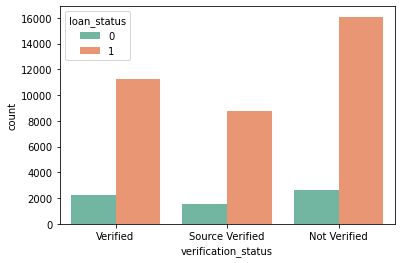

In [ ]:
sns.countplot(df['verification_status'], hue=df['loan_status'], palette='Set2')

In [ ]:
df.verification_status.isna().sum()

0

In [ ]:
#8
df.purpose.nunique()

14

In [ ]:
df.purpose.value_counts()

debt_consolidation    19775
credit_card            5477
other                  4397
home_improvement       3199
major_purchase         2311
small_business         1992
car                    1615
wedding                1004
medical                 753
moving                  629
house                   426
educational             422
vacation                400
renewable_energy        106
Name: purpose, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


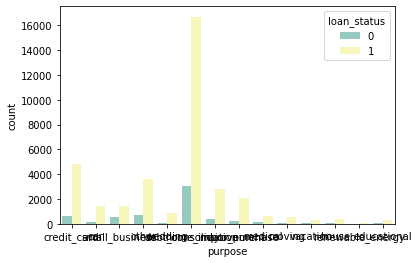

In [ ]:
sns.countplot(df['purpose'], hue=df['loan_status'], palette='Set3')


In [ ]:
df.purpose.isna().sum()

0

In [ ]:
#9
df.debt_settlement_flag.nunique()

2

In [ ]:
df.debt_settlement_flag.value_counts()

N    42346
Y      160
Name: debt_settlement_flag, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


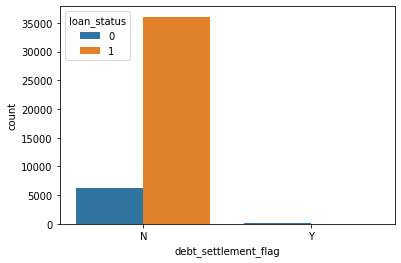

In [ ]:
sns.countplot(df['debt_settlement_flag'], hue=df['loan_status'])

In [ ]:
df[(df['debt_settlement_flag']=='Y') & (df['loan_status']=='Fully Paid')].count().debt_settlement_flag

0

Usuwam jeszcze cztery kolumny, które na podstawie mojej analizy określam jako nieistotne, ponieważ nie wnoszą niczego nowego do analizy

In [ ]:
df = df.drop(columns=['emp_title','sub_grade','verification_status','debt_settlement_flag'])
df.shape

(42506, 25)

Przeprowadzam analizę pozostałych pustych pól pod względem występujących w nich braków i wypełniam je danymi

In [ ]:
df.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length              1112
home_ownership             0
annual_inc                 0
loan_status                0
purpose                    0
dti                        0
delinq_2yrs                0
fico_range_low             0
fico_range_high            0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                61
total_acc                  0
acc_now_delinq             0
pub_rec_bankruptcies    1336
tax_liens                 76
dtype: int64

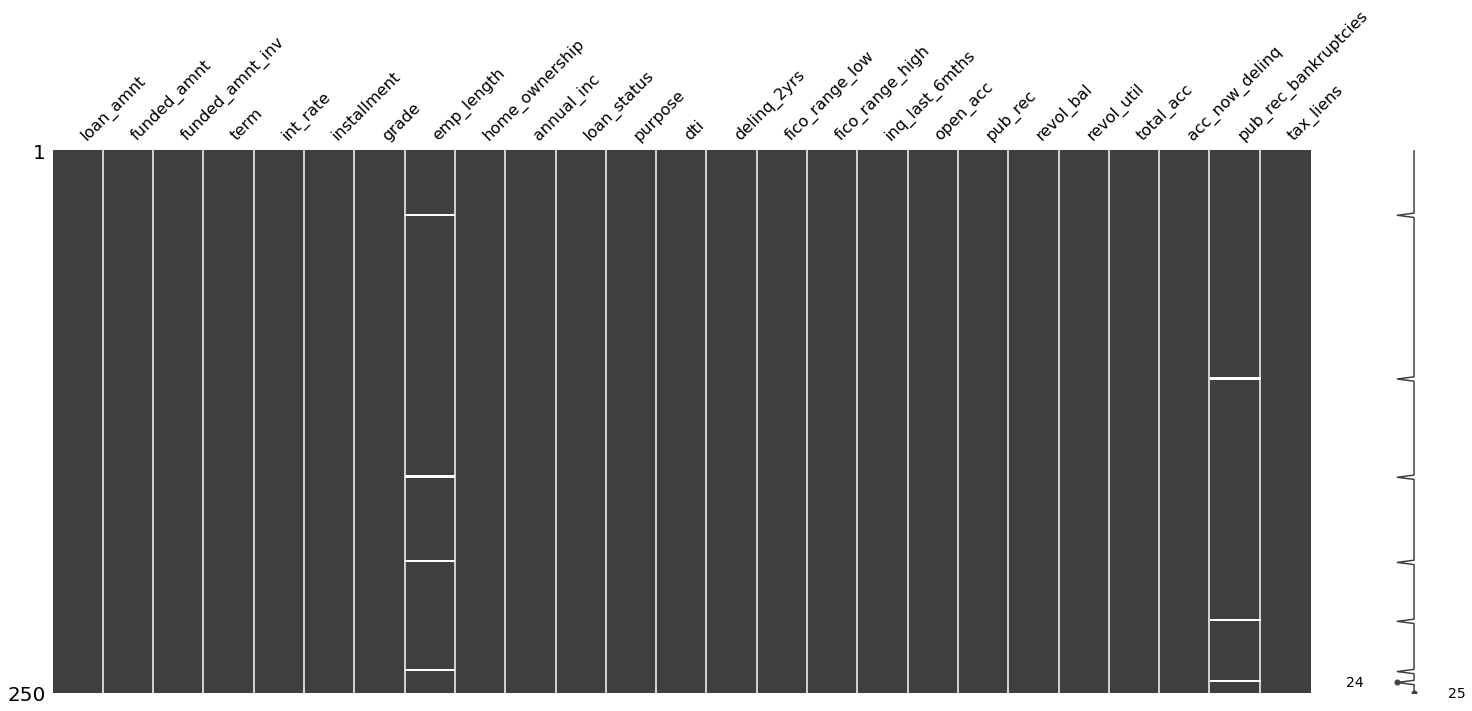

In [ ]:
import missingno as msno
msno.matrix(df.sample(250))

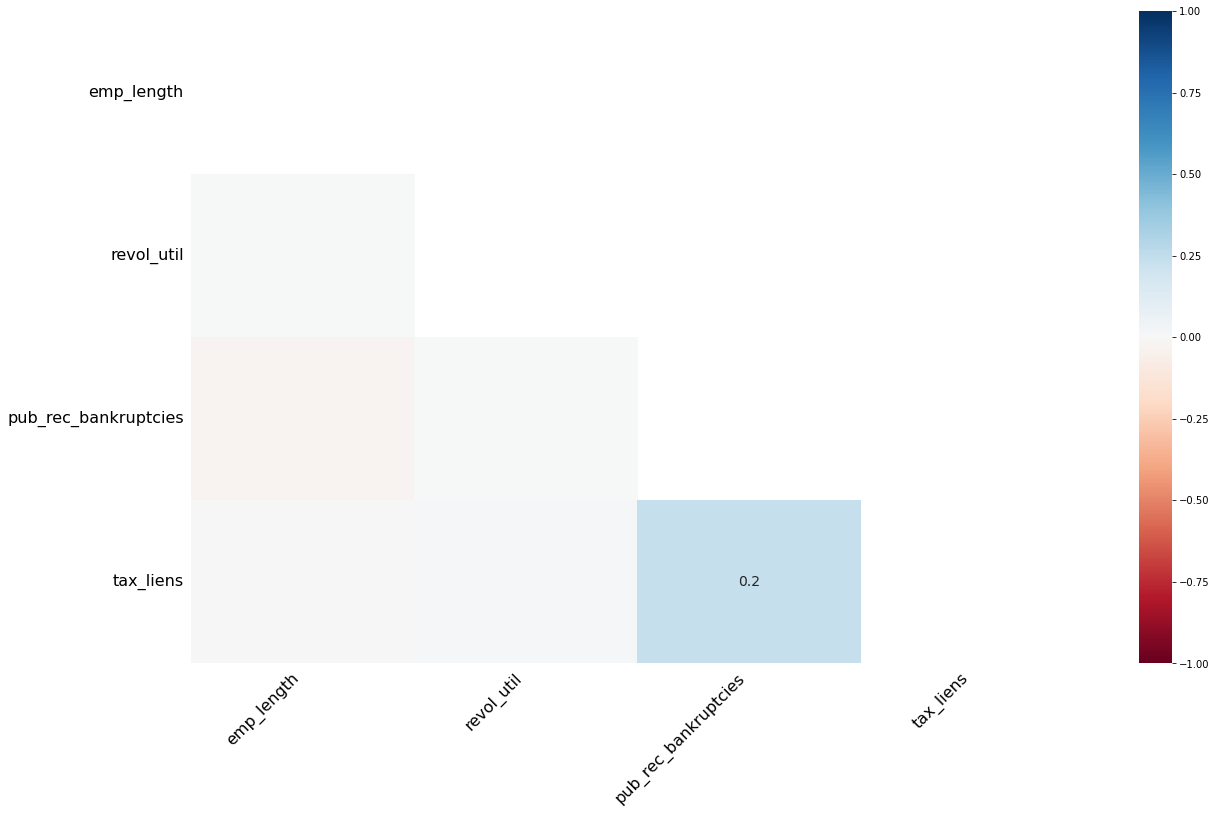

In [ ]:
msno.heatmap(df)

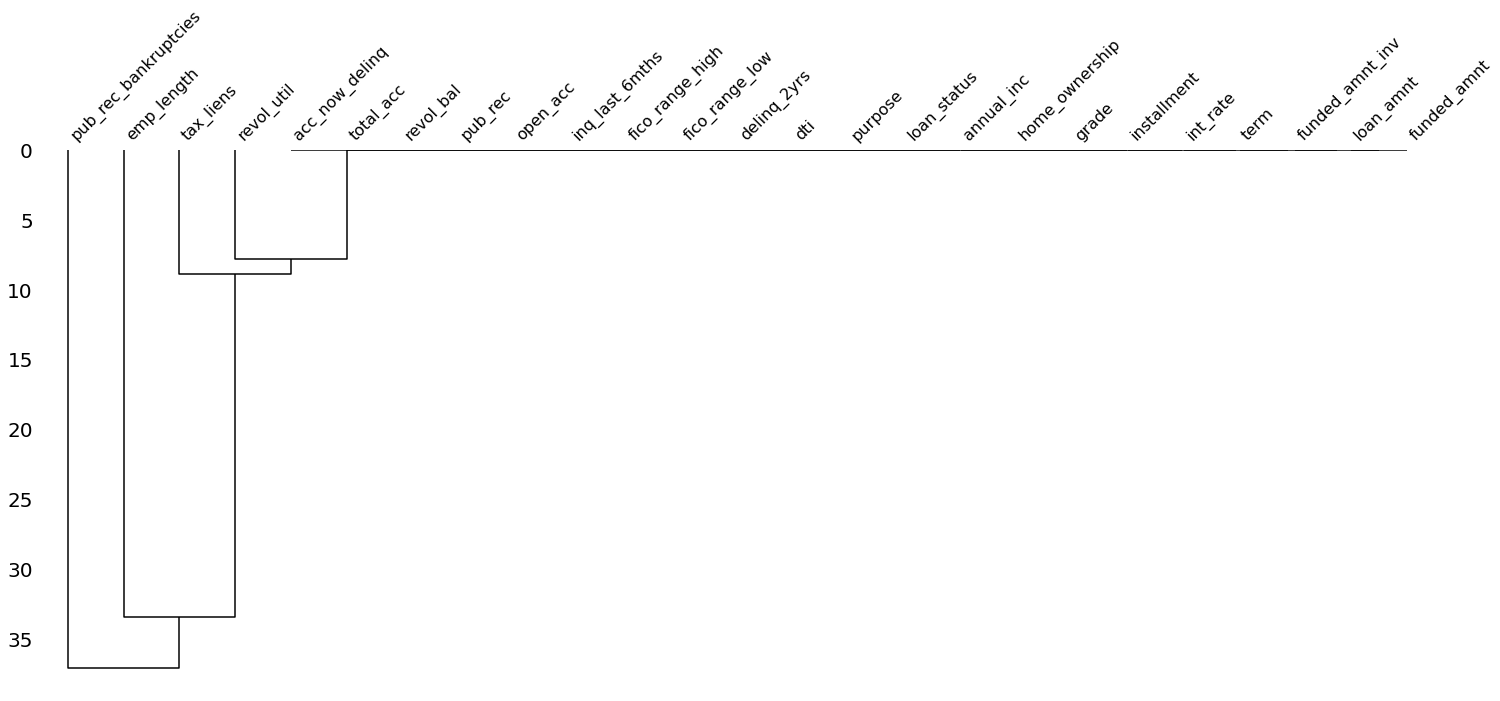

In [ ]:
msno.dendrogram(df)

In [ ]:
df.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

In [ ]:
df.pub_rec_bankruptcies.value_counts()

0.0    39316
1.0     1846
2.0        8
Name: pub_rec_bankruptcies, dtype: int64

In [ ]:
df.pub_rec_bankruptcies.fillna(0, inplace=True)

In [ ]:
df.pub_rec_bankruptcies.isna().sum()

0

In [ ]:
df.head(20)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,purpose,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,pub_rec_bankruptcies,tax_liens
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.00,1,credit_card,27.65,0.0,735.0,739.0,1.0,3.0,0.0,13648.0,83.70,9.0,0.0,0.0,0.0
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.00,0,car,1.00,0.0,740.0,744.0,5.0,3.0,0.0,1687.0,9.40,4.0,0.0,0.0,0.0
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.00,1,small_business,8.72,0.0,735.0,739.0,2.0,2.0,0.0,2956.0,98.50,10.0,0.0,0.0,0.0
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.00,1,other,20.00,0.0,690.0,694.0,1.0,10.0,0.0,5598.0,21.00,37.0,0.0,0.0,0.0
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,1 year,RENT,80000.00,1,other,17.94,0.0,695.0,699.0,0.0,15.0,0.0,27783.0,53.90,38.0,0.0,0.0,0.0
5,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,3 years,RENT,36000.00,1,wedding,11.20,0.0,730.0,734.0,3.0,9.0,0.0,7963.0,28.30,12.0,0.0,0.0,0.0
6,7000.0,7000.0,7000.0,60 months,15.96,170.08,C,8 years,RENT,47004.00,1,debt_consolidation,23.51,0.0,690.0,694.0,1.0,7.0,0.0,17726.0,85.60,11.0,0.0,0.0,0.0
7,3000.0,3000.0,3000.0,36 months,18.64,109.43,E,9 years,RENT,48000.00,1,car,5.35,0.0,660.0,664.0,2.0,4.0,0.0,8221.0,87.50,4.0,0.0,0.0,0.0
8,5600.0,5600.0,5600.0,60 months,21.28,152.39,F,4 years,OWN,40000.00,0,small_business,5.55,0.0,675.0,679.0,2.0,11.0,0.0,5210.0,32.60,13.0,0.0,0.0,0.0
9,5375.0,5375.0,5350.0,60 months,12.69,121.45,B,< 1 year,RENT,15000.00,0,other,18.08,0.0,725.0,729.0,0.0,2.0,0.0,9279.0,36.50,3.0,0.0,0.0,0.0


In [ ]:
df[df.revol_bal == 0].revol_util.shape

(1090,)

In [ ]:
df[df.revol_bal == 0].revol_util.value_counts()

0.00     948
62.31      1
38.60      1
9.34       1
26.33      1
        ... 
0.83       1
24.65      1
8.80       1
49.69      1
44.10      1
Name: revol_util, Length: 84, dtype: int64

In [ ]:
for i in df['revol_bal']:
  if i == 0:
    df['revol_util'].fillna(0, inplace=True)

In [ ]:
df.revol_util.isna().sum()

0

In [ ]:
df.tax_liens.value_counts()

0.0    42429
1.0        1
Name: tax_liens, dtype: int64

In [ ]:
df.tax_liens.fillna(0, inplace=True)

In [ ]:
df.tax_liens.isna().sum()

0

In [ ]:
df['emp_length'].fillna('no_data', inplace=True)

In [ ]:
df.emp_length.isna().sum()

0

In [ ]:
df.isna().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
emp_length              0
home_ownership          0
annual_inc              0
loan_status             0
purpose                 0
dti                     0
delinq_2yrs             0
fico_range_low          0
fico_range_high         0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
acc_now_delinq          0
pub_rec_bankruptcies    0
tax_liens               0
dtype: int64

Zmieniam jeszcze wszystkie zmienne nieliczbowe na typ "category"

In [ ]:
df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [ ]:
df.dtypes.value_counts()

float64     19
category     1
int64        1
category     1
category     1
category     1
category     1
dtype: int64

# Exploratory data analysis 🔍

Wyodrębniam w moich danych dwa zbiory: numeryczny i kategoryczny aby móc przeprowadzać anelizę nie tylko na całym zbiorze ale także osobno dla poszczególnych typów

In [ ]:
dfnumeric = df.select_dtypes(exclude=['category'])

In [ ]:
dfnumeric.shape

(42506, 20)

In [ ]:
dfnumeric = dfnumeric.iloc[:,3:]
dfnumeric.head()

,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,pub_rec_bankruptcies,tax_liens
0,10.65,162.87,24000.0,1,27.65,0.0,735.0,739.0,1.0,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,0.0
1,15.27,59.83,30000.0,0,1.00,0.0,740.0,744.0,5.0,3.0,0.0,1687.0,9.4,4.0,0.0,0.0,0.0
2,15.96,84.33,12252.0,1,8.72,0.0,735.0,739.0,2.0,2.0,0.0,2956.0,98.5,10.0,0.0,0.0,0.0
3,13.49,339.31,49200.0,1,20.00,0.0,690.0,694.0,1.0,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,0.0
4,12.69,67.79,80000.0,1,17.94,0.0,695.0,699.0,0.0,15.0,0.0,27783.0,53.9,38.0,0.0,0.0,0.0


In [ ]:
dfcategory = df.select_dtypes(include=['category'])

In [ ]:
dfcategory.shape

(42506, 5)

In [ ]:
dfcategory.head()

,term,grade,emp_length,home_ownership,purpose
0,36 months,B,10+ years,RENT,credit_card
1,60 months,C,< 1 year,RENT,car
2,36 months,C,10+ years,RENT,small_business
3,36 months,C,10+ years,RENT,other
4,60 months,B,1 year,RENT,other


Sprawdzam 10 najbardziej skorelowanych z targetem zmiennych numerycznych

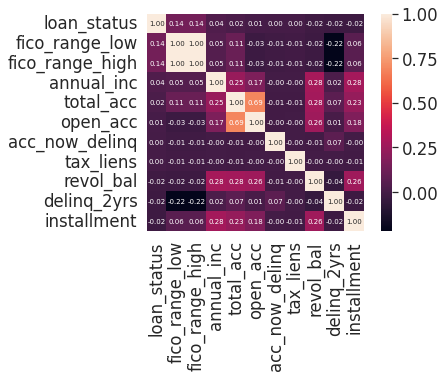

In [ ]:
# 10 najbardziej skorelowanych zmiennych
k = 11
corrmat = dfnumeric.corr()
cols = corrmat.nlargest(k, ['loan_status'])['loan_status'].index
cm = np.corrcoef(dfnumeric[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 7}, yticklabels=cols.values, xticklabels=cols.values)

In [ ]:
correlation = dfnumeric.corr()
print(correlation['loan_status'].sort_values(ascending = False),'\n')

loan_status             1.000000
fico_range_high         0.141931
fico_range_low          0.141931
annual_inc              0.037862
total_acc               0.021115
open_acc                0.005972
acc_now_delinq          0.004095
tax_liens               0.002047
revol_bal              -0.017134
delinq_2yrs            -0.019487
installment            -0.021030
dti                    -0.042118
pub_rec_bankruptcies   -0.050602
pub_rec                -0.053763
revol_util             -0.094019
inq_last_6mths         -0.110900
int_rate               -0.200590
Name: loan_status, dtype: float64 



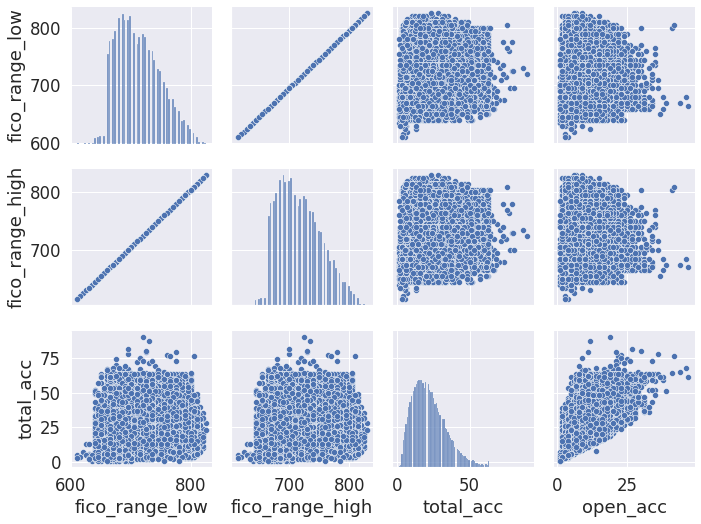

In [ ]:
sns.pairplot(dfnumeric, x_vars=['fico_range_low','fico_range_high','total_acc','open_acc'], 
             y_vars=['fico_range_low','fico_range_high','total_acc'], 
             )

### zbadam dokładniej kolumny związane ze wskaźnikiem FICO

In [ ]:
dfnumeric['difference'] = dfnumeric['fico_range_high'] - dfnumeric['fico_range_low']
dfnumeric.head()

,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,pub_rec_bankruptcies,tax_liens,difference
0,10.65,162.87,24000.0,1,27.65,0.0,735.0,739.0,1.0,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,0.0,4.0
1,15.27,59.83,30000.0,0,1.00,0.0,740.0,744.0,5.0,3.0,0.0,1687.0,9.4,4.0,0.0,0.0,0.0,4.0
2,15.96,84.33,12252.0,1,8.72,0.0,735.0,739.0,2.0,2.0,0.0,2956.0,98.5,10.0,0.0,0.0,0.0,4.0
3,13.49,339.31,49200.0,1,20.00,0.0,690.0,694.0,1.0,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,0.0,4.0
4,12.69,67.79,80000.0,1,17.94,0.0,695.0,699.0,0.0,15.0,0.0,27783.0,53.9,38.0,0.0,0.0,0.0,4.0


In [ ]:
dfnumeric.difference.value_counts()

4.0    42506
Name: difference, dtype: int64

Na podstawie powyższych badań wnioskuję, że:
- póki co nie widać wyraźnej korelacji między statusem pożyczki a którąkolwiek zmienną numeryczną;
- istnieją kolumny, które są mocno skorelowane ze sobą, zatem jedna z tych kolumn jest zbędna do dalszych badań i można ją spokojnie usunąć, tym bardziej, że nie wnoszą zbyt wiele nowych informacji

In [ ]:
df.drop(['fico_range_low'], axis=1, inplace=True)
df.shape

(42506, 24)

## Pytania z projektu:

1. W jaki sposób wynik FICO wiąże się z prawdopodobieństwem spłacenia pożyczki przez pożyczkobiorcę?

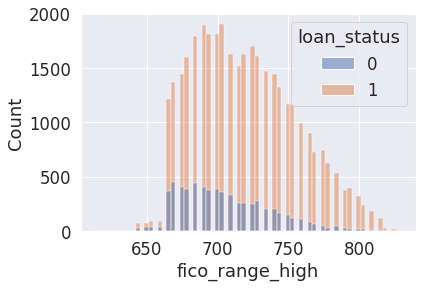

In [ ]:
sns.histplot(data=df, x='fico_range_high', hue='loan_status')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


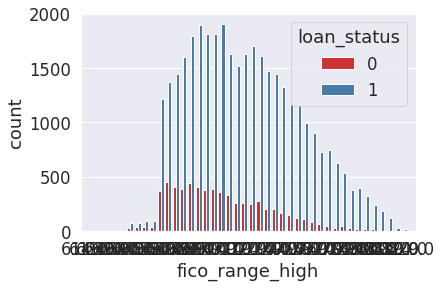

In [ ]:
sns.countplot(df['fico_range_high'], hue=df['loan_status'], palette='Set1')

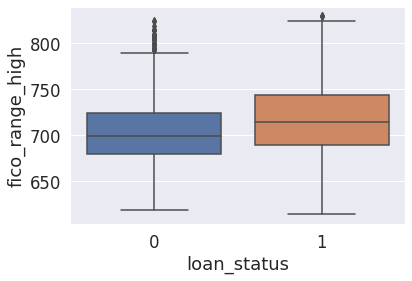

In [ ]:
sns.boxplot(x="loan_status", y="fico_range_high", data=df)

Z powyższych wykresów wnioskuję, że wskaźnik FICO może mieć związek ze statusem pożyczki. Są pewne przesłanki mówiące o tym, że im wyższy jest wynik FICO tym większa szansa, że pożyczka zostanie spłacona

Sprawdzę przy okazji badania tej zmiennej jak wygląda kwestoa outliersów:

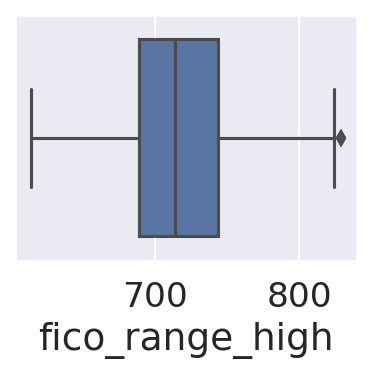

In [ ]:
plt.figure(figsize=(10,10), dpi=150)

plt.subplot(4,3,1)
sns.boxplot(x = 'fico_range_high', data = df)

In [ ]:
Q1=df['fico_range_high'].quantile(q=0.25)
Q3=df['fico_range_high'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', sp.stats.iqr(df['fico_range_high']))

1st Quartile (Q1) is:  689.0
3st Quartile (Q3) is:  744.0
Interquartile range (IQR) is  55.0


In [ ]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in FICO: ', L_outliers)
print('Upper outliers in FICO: ', U_outliers)

Lower outliers in FICO:  606.5
Upper outliers in FICO:  826.5


In [ ]:
print('Number of outliers in FICO upper : ', df[df['fico_range_high']>826.5]['fico_range_high'].count())
print('Number of outliers in FICO lower : ', df[df['fico_range_high']<606.5]['fico_range_high'].count())
print('% of Outlier in FICO upper: ',round(df[df['fico_range_high']>826.5]['fico_range_high'].count()*100/len(df), 5), '%')
print('% of Outlier in FICO lower: ',round(df[df['fico_range_high']<606.5]['fico_range_high'].count()*100/len(df), 5), '%')

Number of outliers in FICO upper :  3
Number of outliers in FICO lower :  0
% of Outlier in FICO upper:  0.00706 %
% of Outlier in FICO lower:  0.0 %


- Ta kolumna nie zawiera wartości mocno odstających od reszty.
Zmienię jej nazwę, aby było łatwiej z niej korzystać w późniejszej analizie

In [ ]:
df.rename(columns={'fico_range_high':'fico_range'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


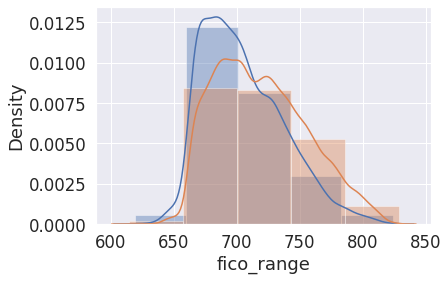

In [ ]:
sns.distplot(df[df['loan_status']==0]['fico_range'], bins=5)
sns.distplot(df[df['loan_status']==1]['fico_range'], bins=5)

Sprawdzam szczegółowe dane na temat kolumny fico_range:

In [ ]:
df.fico_range.describe()

count    42506.000000
mean       717.044982
std         36.182005
min        614.000000
25%        689.000000
50%        714.000000
75%        744.000000
max        829.000000
Name: fico_range, dtype: float64

Z powyższego wynika, że minimalna wartość w tej kolumnie to 614 a maksymalna to 829, podzilę zatem ten zakres na trzy zbiory i zbadam zależność między wskaźnikiem FICO a statusem pożyczki dla poszczególnych zakresów

- zakres z wartościami wskaźnika FICO powyżej 740:

In [ ]:
x1 = df[(df['fico_range'] >= 740) & (df['loan_status'] == 1)].count().loan_status
x2 = df[(df['fico_range'] >= 740) & (df['loan_status'] == 0)].count().loan_status

In [ ]:
percent1 = round(x1*100 / (x1+x2), 2)
percent2 = round(x2*100 / (x1+x2), 2)

- zakres z wartościami wskaźnika FICO między 739 a 641:

In [ ]:
x3 = df[(df['fico_range'] <= 739) & (df['fico_range'] >= 641) & (df['loan_status'] == 1)].count().loan_status
x4 = df[(df['fico_range'] <= 739) & (df['fico_range'] >= 641) & (df['loan_status'] == 0)].count().loan_status

In [ ]:
percent3 = round(x3*100 / (x3+x4), 2)
percent4 = round(x4*100 / (x3+x4), 2)

- zakres z wartościami wskaźnika FICO poniżej 640:

In [ ]:
x5 = df[(df['fico_range'] <= 640) & (df['loan_status'] == 1)].count().loan_status
x6 = df[(df['fico_range'] <= 640) & (df['loan_status'] == 0)].count().loan_status

In [ ]:
percent5 = round(x5*100 / (x5+x6), 2)
percent6 = round(x6*100 / (x5+x6), 2)

In [ ]:
fico_check = pd.DataFrame({'FICO':['More_than_740', '739_to_641', 'Less_than_640'], 
                           'Fully_paid':[percent1,percent3,percent5], 
                           'Charged_off':[percent2,percent4,percent6]})
fico_check

,FICO,Fully_paid,Charged_off
0,More_than_740,91.50,8.50
1,739_to_641,82.64,17.36
2,Less_than_640,52.94,47.06


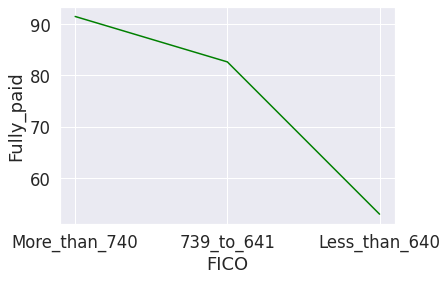

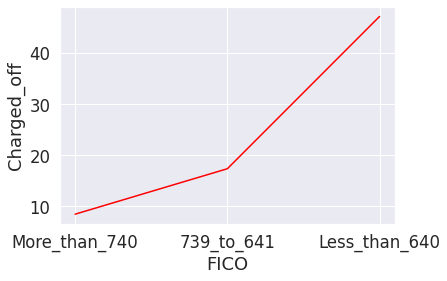

In [ ]:
sns.lineplot(y=fico_check['Fully_paid'], x=fico_check['FICO'],color='green')
plt.show()
sns.lineplot(y=fico_check['Charged_off'], x=fico_check['FICO'], color='red')
plt.show()

In [ ]:
from scipy.stats import ttest_rel
stat, p = sp.stats.ttest_rel(df['loan_status'], df['fico_range'])
print('stat=%.3f, p=%.3f' % (stat, p))

stat=-4086.527, p=0.000


WNIOSKI: Istnieje pewna zależność pomiędzy wskaźnikiem FICO a prawdopodobieństwem spłaty zadłużenia, co pokazała analiza trzech zakresów, na który został podzielony przedział wyników FICO dla poszczególnych klientów. Zależność jest jednak na tyle niewielka, że test statystyczny w ogóle tej zależności nie wyłapał.

2. W jaki sposób wiek kredytowy wiąże się z prawdopodobieństwem niewykonania zobowiązania i czy ryzyko to jest niezależne lub związane z wynikiem FICO

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


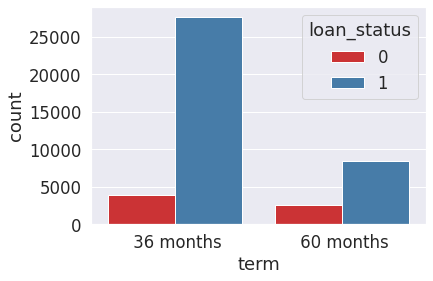

In [ ]:
sns.countplot(df['term'], hue=df['loan_status'], palette='Set1')

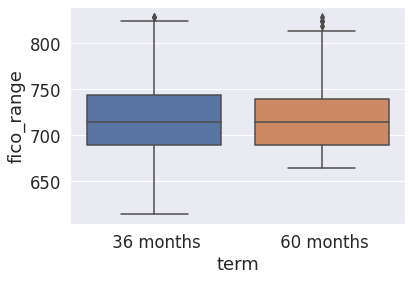

In [ ]:
sns.boxplot(x="term", y="fico_range", data=df)

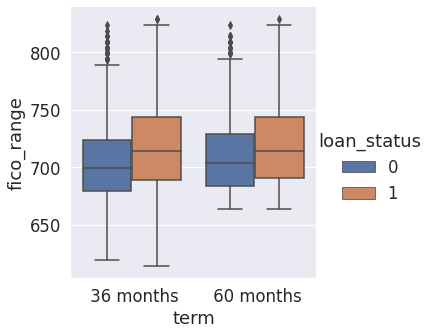

In [ ]:
sns.catplot(y='fico_range', x='term', hue='loan_status', kind="box", data=df)

In [ ]:
df.term.dtype

CategoricalDtype(categories=[' 36 months', ' 60 months'], ordered=False)

In [ ]:
y1 = df[(df['term'] == ' 36 months') & (df['loan_status'] == 1)].count().term
y2 = df[(df['term'] == ' 36 months') & (df['loan_status'] == 0)].count().term

In [ ]:
yp1 = round(y1*100 / (y1+y2), 2)
yp2 = round(y2*100 / (y1+y2), 2)

In [ ]:
y3 = df[(df['term'] == ' 60 months') & (df['loan_status'] == 1)].count().loan_status
y4 = df[(df['term'] == ' 60 months') & (df['loan_status'] == 0)].count().loan_status

In [ ]:
yp3 = round(y3*100 / (y3+y4), 2)
yp4 = round(y4*100 / (y3+y4), 2)

In [ ]:
term_check = pd.DataFrame({'Term':['36 months','60 months'], 
                           'Fully_paid':[yp1,yp3], 
                           'Charged_off':[yp2,yp4]})
term_check

,Term,Fully_paid,Charged_off
0,36 months,87.71,12.29
1,60 months,76.77,23.23


In [ ]:
df_table=pd.crosstab(df['term'],df['loan_status'])
print(df_table)

loan_status     0      1
term                    
 36 months   3873  27632
 60 months   2555   8446


In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stat, p, dof, expected = chi2_contingency(df_table)
print('dof=%d' % dof)
print(expected)

prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=1
[[ 4764.36597186 26740.63402814]
 [ 1663.63402814  9337.36597186]]
probability=0.950, critical=3.841, stat=758.308
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


WNIOSKI: Wydaje mi się, że osoby biorące pożyczki na krótszy termin (36 miesięcy) częściej je spłacają, natomiast nie jest to mocna zależność. Wskaźnik FICO nie jest w żaden sposób powiązany z samym terminem płatności - nie widać, aby osoby, z wyższym FICO i krótszym terminem płatności spłacały zadłużenie częściej niż pozostałe.

3. W jaki sposób status kredytu hipotecznego na dom wiąże się z prawdopodobieństwem niewypłacalności?

In [ ]:
df.home_ownership.value_counts()

RENT        20164
MORTGAGE    18952
OWN          3250
OTHER         136
NONE            4
Name: home_ownership, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


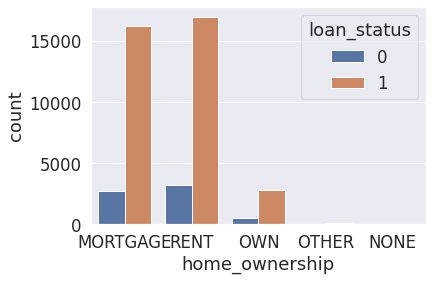

In [ ]:
home_list = ['MORTGAGE','RENT','OWN','OTHER','NONE']
sns.countplot(df['home_ownership'],hue=df['loan_status'], order=home_list)

In [ ]:
df[(df['home_ownership'] == 'MORTGAGE')].count().home_ownership

18952

In [ ]:
z1 = df[(df['home_ownership'] == 'MORTGAGE') & (df['loan_status'] == 1)].count().loan_status
z2 = df[(df['home_ownership'] == 'MORTGAGE') & (df['loan_status'] == 0)].count().loan_status
z3 = df[(df['home_ownership'] == 'RENT') & (df['loan_status'] == 1)].count().loan_status
z4 = df[(df['home_ownership'] == 'RENT') & (df['loan_status'] == 0)].count().loan_status
z5 = df[(df['home_ownership'] == 'OWN') & (df['loan_status'] == 1)].count().loan_status
z6 = df[(df['home_ownership'] == 'OWN') & (df['loan_status'] == 0)].count().loan_status

In [ ]:
zp1 = round(z1*100 / len(df[(df['loan_status'] == 1)]), 2)
zp2 = round(z2*100 / len(df[(df['loan_status'] == 0)]), 2)
zp3 = round(z3*100 / len(df[(df['loan_status'] == 1)]), 2)
zp4 = round(z4*100 / len(df[(df['loan_status'] == 0)]), 2)
zp5 = round(z5*100 / len(df[(df['loan_status'] == 1)]), 2)
zp6 = round(z6*100 / len(df[(df['loan_status'] == 0)]), 2)

Pożyczki spłacone i nie spłacone w poszczególnych grupach własności na tle wszystkich kredytobiorców:

In [ ]:
m_check = pd.DataFrame({'Home ownership':['MORTGAGE','RENT','OWN'], 
                           'Fully_paid':[zp1,zp3,zp5], 
                           'Charged_off':[zp2,zp4,zp6]})
m_check

,Home ownership,Fully_paid,Charged_off
0,MORTGAGE,45.05,41.97
1,RENT,47.01,49.86
2,OWN,7.64,7.70


In [ ]:
zzp1 = round(z1*100 / (z1+z2), 2)
zzp2 = round(z2*100 / (z1+z2), 2)
zzp3 = round(z3*100 / (z3+z4), 2)
zzp4 = round(z4*100 / (z3+z4), 2)
zzp5 = round(z5*100 / (z5+z6), 2)
zzp6 = round(z6*100 / (z5+z6), 2)

Proporcja spłacających do niespłacających w poszczególnych grupach własności:

In [ ]:
m2_check = pd.DataFrame({'Home ownership':['MORTGAGE','RENT','OWN'], 
                           'Fully_paid':[zzp1,zzp3,zzp5], 
                           'Charged_off':[zzp2,zzp4,zzp6]})
m2_check

,Home ownership,Fully_paid,Charged_off
0,MORTGAGE,85.76,14.24
1,RENT,84.11,15.89
2,OWN,84.77,15.23


In [ ]:
home_table=pd.crosstab(df['home_ownership'],df['loan_status'])
print(home_table)

loan_status        0      1
home_ownership             
MORTGAGE        2698  16254
NONE               1      3
OTHER             29    107
OWN              495   2755
RENT            3205  16959


In [ ]:
stat, p, dof, expected = chi2_contingency(home_table)
print('dof=%d' % dof)
print(expected)

prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=4
[[2.86602964e+03 1.60859704e+04]
 [6.04902837e-01 3.39509716e+00]
 [2.05666965e+01 1.15433304e+02]
 [4.91483555e+02 2.75851644e+03]
 [3.04931520e+03 1.71146848e+04]]
probability=0.950, critical=9.488, stat=25.379
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


WNIOSKI: Według mnie status kredytu hipotecznego na dom nie zwiększa ryzyka niewykonania zobowiązania. Na podstawie powyższych badań widać, że klienci posiadający kredyt hipoteczny w większości spłacają zobowiązania wynikające z zaciągniętej pożyczki.

4. W jaki sposób roczny dochód wiąże się z prawdopodobieństwem niewykonania zobowiązania?

In [ ]:
df.annual_inc.describe()

count    4.250600e+04
mean     6.913534e+04
std      6.409604e+04
min      1.896000e+03
25%      4.000000e+04
50%      5.900000e+04
75%      8.248500e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

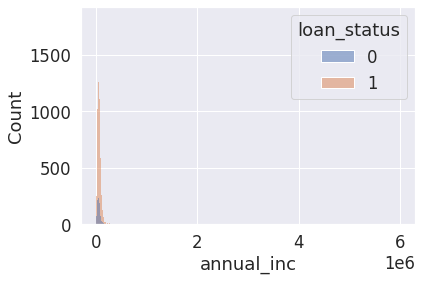

In [ ]:
sns.histplot(data=df, x='annual_inc', hue='loan_status')

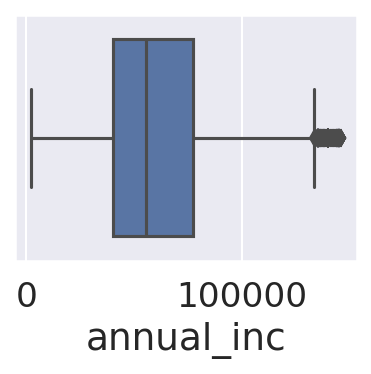

In [ ]:
plt.figure(figsize=(10,10), dpi=150)

plt.subplot(4,3,1)
sns.boxplot(x = 'annual_inc', data = df)

Kolumna z dochodem zawiera sporo outliersów, co utrudnia jej analizę a w kolejnych fazach może zaburzać wynik predykcji. W pierwszej kolejności pozbędę się mocno odstających danych a następnie przeprowadzę analizę ponownie.


In [ ]:
Q1=df['annual_inc'].quantile(q=0.25)
Q3=df['annual_inc'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', sp.stats.iqr(df['annual_inc']))

1st Quartile (Q1) is:  40000.0
3st Quartile (Q3) is:  82485.0
Interquartile range (IQR) is  42485.0


In [ ]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Income: ', L_outliers)
print('Upper outliers in Income: ', U_outliers)

Lower outliers in Income:  -23727.5
Upper outliers in Income:  146212.5


In [ ]:
print('Number of outliers in Income upper : ', df[df['annual_inc']>146212.5]['annual_inc'].count())
print('Number of outliers in Income lower : ', df[df['annual_inc']<-23727.5]['annual_inc'].count())
print('% of Outlier in Income upper: ',round(df[df['annual_inc']>146212.5]['annual_inc'].count()*100/len(df), 5), '%')
print('% of Outlier in Income lower: ',round(df[df['annual_inc']<-23727.5]['annual_inc'].count()*100/len(df), 5), '%')

Number of outliers in Income upper :  2029
Number of outliers in Income lower :  0
% of Outlier in Income upper:  4.77344 %
% of Outlier in Income lower:  0.0 %


In [ ]:
outliers = df[(df['annual_inc']>146212.5)]
outliers.index
df = df.drop(outliers.index, axis=0)

In [ ]:
df.shape

(40477, 24)

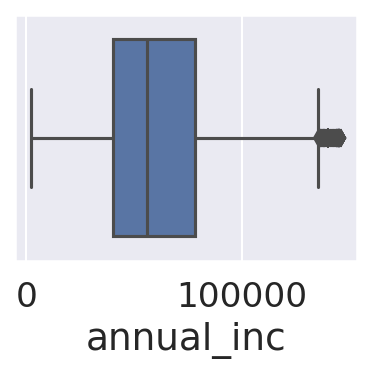

In [ ]:
plt.figure(figsize=(10,10), dpi=150)

plt.subplot(4,3,1)
sns.boxplot(x = 'annual_inc', data = df)

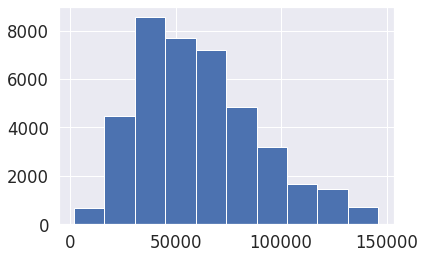

In [ ]:
df.annual_inc.hist()

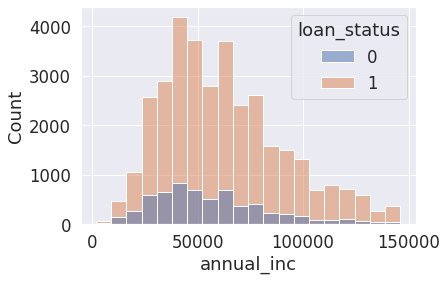

In [ ]:
sns.histplot(data=df, x='annual_inc', hue='loan_status', bins = 20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


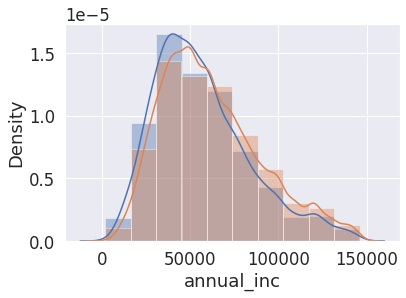

In [ ]:
sns.distplot(df[df['loan_status']==0]['annual_inc'], bins=10)
sns.distplot(df[df['loan_status']==1]['annual_inc'], bins=10)

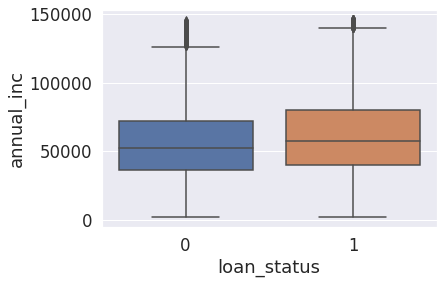

In [ ]:
sns.boxplot(x="loan_status", y="annual_inc", data=df)

In [ ]:
a1 = df[(df['annual_inc'] >= 78000) & (df['loan_status'] == 1)].count().loan_status
a2 = df[(df['annual_inc'] >= 78000) & (df['loan_status'] == 0)].count().loan_status
a3 = df[(df['annual_inc'] < 78000) & (df['annual_inc'] >= 40000) & (df['loan_status'] == 1)].count().loan_status
a4 = df[(df['annual_inc'] < 78000) & (df['annual_inc'] >= 40000) & (df['loan_status'] == 0)].count().loan_status
a5 = df[(df['annual_inc'] < 40000) & (df['loan_status'] == 1)].count().loan_status
a6 = df[(df['annual_inc'] < 40000) & (df['loan_status'] == 0)].count().loan_status

In [ ]:
ap1 = round(a1*100 / (a1+a2), 2)
ap2 = round(a2*100 / (a1+a2), 2)
ap3 = round(a3*100 / (a3+a4), 2)
ap4 = round(a4*100 / (a3+a4), 2)
ap5 = round(a5*100 / (a5+a6), 2)
ap6 = round(a6*100 / (a5+a6), 2)

In [ ]:
income_check = pd.DataFrame({'Annual income':['More_than_78.000', 'between_78.000-and-40.000', 'Less_than_40.000'], 
                           'Fully_paid':[ap1,ap3,ap5], 
                           'Charged_off':[ap2,ap4,ap6]})
income_check

,Annual income,Fully_paid,Charged_off
0,More_than_78.000,88.04,11.96
1,between_78.000-and-40.000,84.69,15.31
2,Less_than_40.000,81.42,18.58


In [ ]:
sp.stats.ttest_rel(df['loan_status'], df['annual_inc'])
print('stat=%.3f, p=%.3f' % (stat, p))

stat=25.379, p=0.000


WNIOSKI: Można zauważyć bardzo niewielką zależność pomiędzy wysykością dochodów a ryzykiem niespłacenia kredytu - im niższy dochód, tym większe prawdopodobieństwo, że kredyt nie będzie spłacany. Jest to jednak bardzo mała zależność, co obrazuje wynik testu statystycznego.

5. W jaki sposób historia zatrudnienia wiąże się z prawdopodobieństwem niewykonania zobowiązania?

In [ ]:
df.emp_length.value_counts()

10+ years    8729
< 1 year     4860
2 years      4546
3 years      4171
4 years      3503
1 year       3460
5 years      3301
6 years      2270
7 years      1796
8 years      1491
9 years      1256
no_data      1094
Name: emp_length, dtype: int64

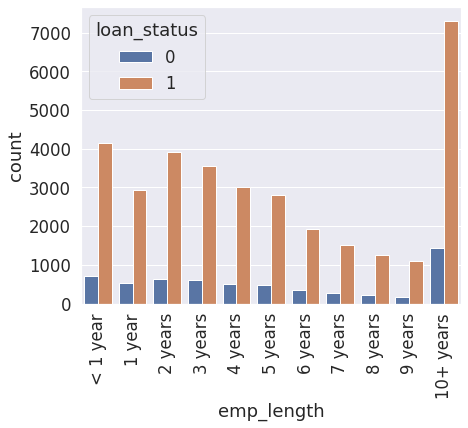

In [ ]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
emp_list = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
emp = sns.countplot(x='emp_length', data=df, hue='loan_status', order=emp_list)
emp.set_xticklabels(emp.get_xticklabels(), rotation=90);


In [ ]:
for year in df.emp_length.unique():
    print(f"{year} of work:")
    print(f"{df[df.emp_length == year].loan_status.value_counts(normalize=True)}")
    print('________________________________________')

10+ years of work:
1    0.835949
0    0.164051
Name: loan_status, dtype: float64
________________________________________
< 1 year of work:
1    0.851235
0    0.148765
Name: loan_status, dtype: float64
________________________________________
1 year of work:
1    0.84422
0    0.15578
Name: loan_status, dtype: float64
________________________________________
3 years of work:
1    0.854471
0    0.145529
Name: loan_status, dtype: float64
________________________________________
8 years of work:
1    0.849765
0    0.150235
Name: loan_status, dtype: float64
________________________________________
9 years of work:
1    0.866242
0    0.133758
Name: loan_status, dtype: float64
________________________________________
4 years of work:
1    0.857836
0    0.142164
Name: loan_status, dtype: float64
________________________________________
5 years of work:
1    0.853075
0    0.146925
Name: loan_status, dtype: float64
________________________________________
6 years of work:
1    0.850661
0    0.14

In [ ]:
emp_table=pd.crosstab(df['emp_length'],df['loan_status'])
print(emp_table)

loan_status     0     1
emp_length             
1 year        539  2921
10+ years    1432  7297
2 years       631  3915
3 years       607  3564
4 years       498  3005
5 years       485  2816
6 years       339  1931
7 years       282  1514
8 years       224  1267
9 years       168  1088
< 1 year      723  4137
no_data       242   852


In [ ]:
stat, p, dof, expected = chi2_contingency(emp_table)
print('dof=%d' % dof)
print(expected)

prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=11
[[ 527.41556934 2932.58443066]
 [1330.58107073 7398.41892927]
 [ 692.95698792 3853.04301208]
 [ 635.79489587 3535.20510413]
 [ 533.97015589 2969.02984411]
 [ 503.17884231 2797.82115769]
 [ 346.02119722 1923.97880278]
 [ 273.76831287 1522.23168713]
 [ 227.276478   1263.723522  ]
 [ 191.45490031 1064.54509969]
 [ 740.820713   4119.179287  ]
 [ 166.76087655  927.23912345]]
probability=0.950, critical=19.675, stat=65.592
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


WNIOSKI: Jak widać z powyższej analizy historia zatrudnienia nie ma absolutnie żadnego wpływu na ryzyko związane ze spłatą zadłużenia. W poszczególnych przedziałach długości zatrudnienia stosunek pożyczek spłaconych do niespłaconych jest w zasadzie taki sam. Ta kolumna nie wnosi żadnych istotnych informacji, dlatego spokojnie może zostać usunięta.

In [ ]:
df.drop(['emp_length'], axis=1, inplace=True)
df.shape

(40477, 23)

6. Jak wielkość żądanej pożyczki jest powiązana z prawdopodobieństwem niewykonania zobowiązania?

In [ ]:
df.loan_amnt.describe()

count    40477.000000
mean     10738.214295
std       7128.415399
min        500.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

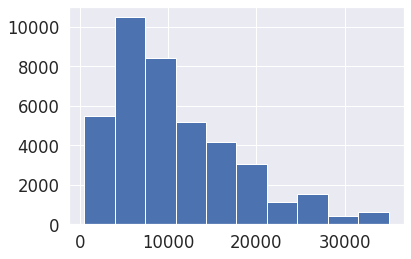

In [ ]:
df.loan_amnt.hist()

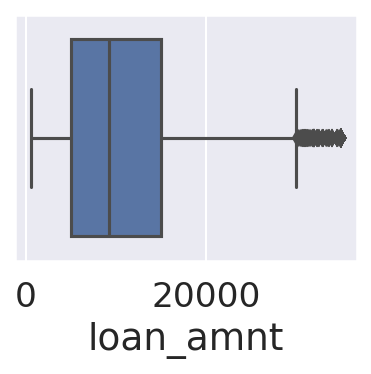

In [ ]:
plt.figure(figsize=(10,10), dpi=150)

plt.subplot(4,3,1)
sns.boxplot(x = 'loan_amnt', data = df)

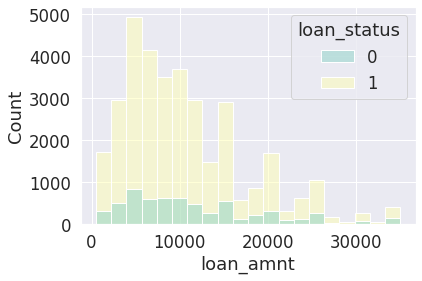

In [ ]:
sns.histplot(data=df, x="loan_amnt", hue="loan_status", bins=20, palette="Set3")

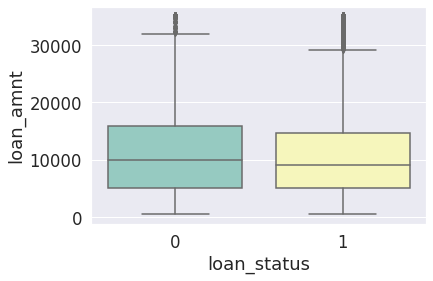

In [ ]:
sns.boxplot(x="loan_status", y="loan_amnt", data=df, palette="Set3")

In [ ]:
Q1=df['loan_amnt'].quantile(q=0.25)
Q3=df['loan_amnt'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', sp.stats.iqr(df['loan_amnt']))

1st Quartile (Q1) is:  5000.0
3st Quartile (Q3) is:  15000.0
Interquartile range (IQR) is  10000.0


In [ ]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Loan amount: ', L_outliers)
print('Upper outliers in Loan amount: ', U_outliers)

Lower outliers in Loan amount:  -10000.0
Upper outliers in Loan amount:  30000.0


In [ ]:
print('Number of outliers in Loan amount upper : ', df[df['loan_amnt']>30000.0]['loan_amnt'].count())
print('Number of outliers in Loan amount lower : ', df[df['loan_amnt']<-10000.0]['loan_amnt'].count())
print('% of Outlier in Loan amount upper: ',round(df[df['loan_amnt']>30000.0]['loan_amnt'].count()*100/len(df), 5), '%')
print('% of Outlier in Loan amount lower: ',round(df[df['loan_amnt']<-10000.0]['loan_amnt'].count()*100/len(df), 5), '%')

Number of outliers in Loan amount upper :  632
Number of outliers in Loan amount lower :  0
% of Outlier in Loan amount upper:  1.56138 %
% of Outlier in Loan amount lower:  0.0 %


Ta kolumna zawiera pewną ilość odstających wartości, jednak nie są one na tyle znaczące, aby trzeba je było usuwać.

In [ ]:
la1 = df[(df['loan_amnt'] >= 20000) & (df['loan_status'] == 1)].count().loan_status
la2 = df[(df['loan_amnt'] >= 20000) & (df['loan_status'] == 0)].count().loan_status
la3 = df[(df['loan_amnt'] < 20000) & (df['loan_amnt'] >= 9000) & (df['loan_status'] == 1)].count().loan_status
la4 = df[(df['loan_amnt'] < 20000) & (df['loan_amnt'] >= 9000) & (df['loan_status'] == 0)].count().loan_status
la5 = df[(df['loan_amnt'] < 9000) & (df['loan_status'] == 1)].count().loan_status
la6 = df[(df['loan_amnt'] < 9000) & (df['loan_status'] == 0)].count().loan_status

In [ ]:
lap1 = round(la1*100 / (la1+la2), 2)
lap2 = round(la2*100 / (la1+la2), 2)
lap3 = round(la3*100 / (la3+la4), 2)
lap4 = round(la4*100 / (la3+la4), 2)
lap5 = round(la5*100 / (la5+la6), 2)
lap6 = round(la6*100 / (la5+la6), 2)

In [ ]:
loan_amnt_check = pd.DataFrame({'Loan amount':['More_than_20.000', 'between_20.000-and-9.000', 'Less_than_9.000'], 
                           'Fully_paid':[lap1,lap3,lap5], 
                           'Charged_off':[lap2,lap4,lap6]})
loan_amnt_check

,Loan amount,Fully_paid,Charged_off
0,More_than_20.000,81.13,18.87
1,between_20.000-and-9.000,84.91,15.09
2,Less_than_9.000,85.68,14.32


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


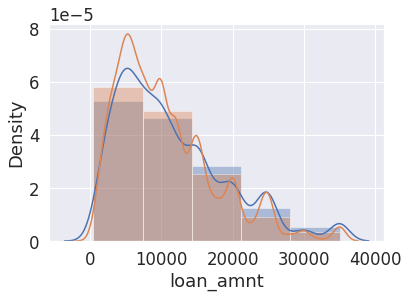

In [ ]:
sns.distplot(df[df['loan_status']==0]['loan_amnt'], bins=5)
sns.distplot(df[df['loan_status']==1]['loan_amnt'], bins=5)

In [ ]:
from scipy.stats import ttest_rel
stat, p = sp.stats.ttest_rel(df['loan_status'], df['loan_amnt'])
print('stat=%.3f, p=%.3f' % (stat, p))

stat=-303.046, p=0.000


WNIOSKI: Istnieje niewielkie ryzyko, że pożyczki o większej wartości mogą nie być spłacane przez pożyczkobiorców. Nie jest to bardzo wyraźna zależnośc, jednak nie można jej wykluczyć.

Przyjrzę się jeszcze kilku kolumnom, które zaciekawiły mnie w toku analizy a także sprawdzę, jak wygląda kwestia outliersów

- int_rate
- dti
- total_acc
- grade
- purpose

In [ ]:
df.int_rate.describe()

count    40477.000000
mean        12.116946
std          3.683501
min          5.420000
25%          9.620000
50%         11.990000
75%         14.650000
max         24.400000
Name: int_rate, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


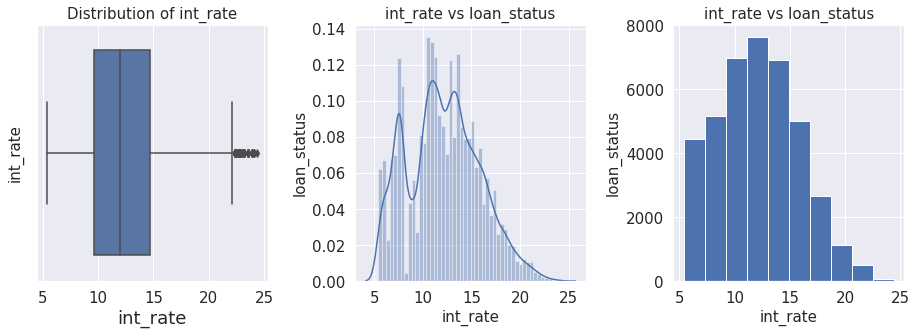

In [ ]:
#int_rate
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='int_rate',data=df,orient='v',ax=ax1)
ax1.set_ylabel('int_rate', fontsize=15)
ax1.set_title('Distribution of int_rate', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['int_rate'],ax=ax2)
ax2.set_xlabel('int_rate', fontsize=15)
ax2.set_ylabel('loan_status', fontsize=15)
ax2.set_title('int_rate vs loan_status', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['int_rate'])
ax3.set_xlabel('int_rate', fontsize=15)
ax3.set_ylabel('loan_status', fontsize=15)
ax3.set_title('int_rate vs loan_status', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

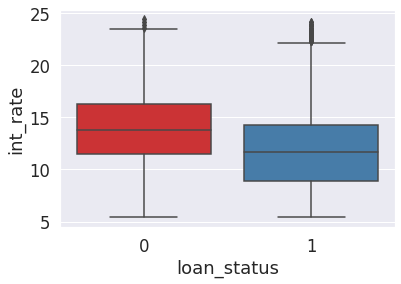

In [ ]:
sns.boxplot(x="loan_status", y="int_rate", data=df, palette="Set1")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


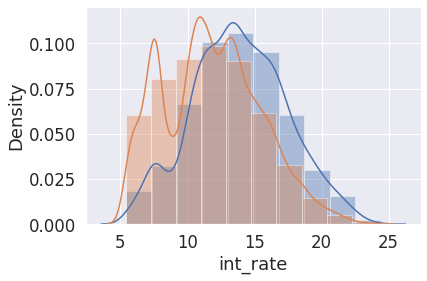

In [ ]:
sns.distplot(df[df['loan_status']==0]['int_rate'], bins=10)
sns.distplot(df[df['loan_status']==1]['int_rate'], bins=10)

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


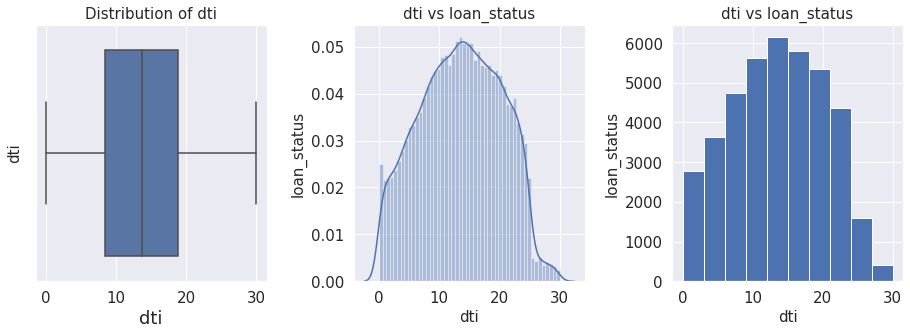

In [ ]:
#dti
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='dti',data=df,orient='v',ax=ax1)
ax1.set_ylabel('dti', fontsize=15)
ax1.set_title('Distribution of dti', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['dti'],ax=ax2)
ax2.set_xlabel('dti', fontsize=15)
ax2.set_ylabel('loan_status', fontsize=15)
ax2.set_title('dti vs loan_status', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['dti'])
ax3.set_xlabel('dti', fontsize=15)
ax3.set_ylabel('loan_status', fontsize=15)
ax3.set_title('dti vs loan_status', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [ ]:
df.dti.describe()

count    40477.000000
mean        13.538350
std          6.715899
min          0.000000
25%          8.400000
50%         13.680000
75%         18.850000
max         29.990000
Name: dti, dtype: float64

In [ ]:
df.dti.nunique()

2889

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


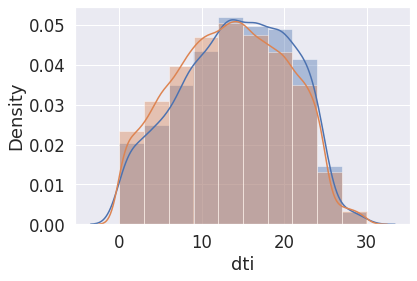

In [ ]:
sns.distplot(df[df['loan_status']==0]['dti'], bins=10)
sns.distplot(df[df['loan_status']==1]['dti'], bins=10)

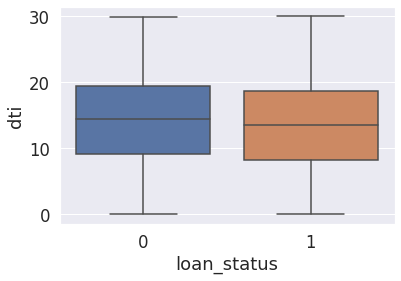

In [ ]:
sns.boxplot(x="loan_status", y="dti", data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


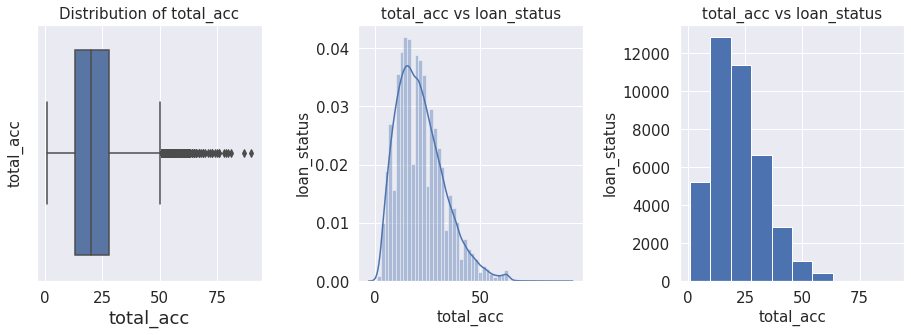

In [ ]:
#total_acc
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='total_acc',data=df,orient='v',ax=ax1)
ax1.set_ylabel('total_acc', fontsize=15)
ax1.set_title('Distribution of total_acc', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['total_acc'],ax=ax2)
ax2.set_xlabel('total_acc', fontsize=15)
ax2.set_ylabel('loan_status', fontsize=15)
ax2.set_title('total_acc vs loan_status', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['total_acc'])
ax3.set_xlabel('total_acc', fontsize=15)
ax3.set_ylabel('loan_status', fontsize=15)
ax3.set_title('total_acc vs loan_status', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [ ]:
df.total_acc.describe()

count    40477.000000
mean        21.700744
std         11.378652
min          1.000000
25%         13.000000
50%         20.000000
75%         28.000000
max         90.000000
Name: total_acc, dtype: float64

In [ ]:
Q1=df['total_acc'].quantile(q=0.25)
Q3=df['total_acc'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', sp.stats.iqr(df['total_acc']))

1st Quartile (Q1) is:  13.0
3st Quartile (Q3) is:  28.0
Interquartile range (IQR) is  15.0


In [ ]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in total_acc: ', L_outliers)
print('Upper outliers in total_acc: ', U_outliers)

Lower outliers in total_acc:  -9.5
Upper outliers in total_acc:  50.5


In [ ]:
print('Number of outliers in total_acc upper : ', df[df['total_acc']>50.5]['total_acc'].count())
print('Number of outliers in total_acc lower : ', df[df['total_acc']<-9.5]['total_acc'].count())
print('% of Outlier in total_acc upper: ',round(df[df['total_acc']>50.5]['total_acc'].count()*100/len(df), 5), '%')
print('% of Outlier in total_acc lower: ',round(df[df['total_acc']<-9.5]['total_acc'].count()*100/len(df), 5), '%')

Number of outliers in total_acc upper :  773
Number of outliers in total_acc lower :  0
% of Outlier in total_acc upper:  1.90973 %
% of Outlier in total_acc lower:  0.0 %


In [ ]:
outliers = df[(df['total_acc']>50.5)]
outliers.index
df = df.drop(outliers.index, axis=0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


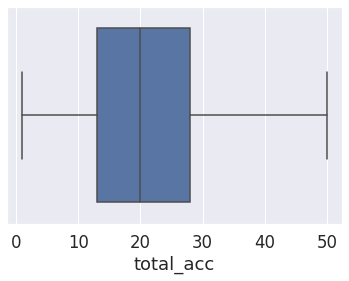

In [ ]:
sns.boxplot(df.total_acc)

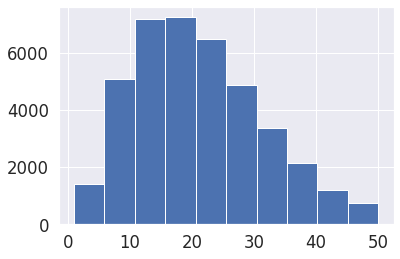

In [ ]:
df.total_acc.hist()

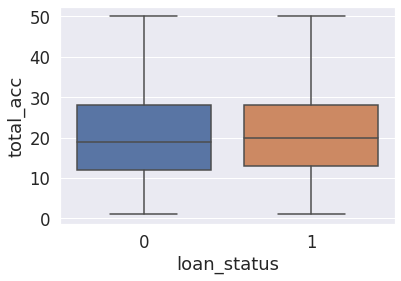

In [ ]:
sns.boxplot(x="loan_status", y="total_acc", data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


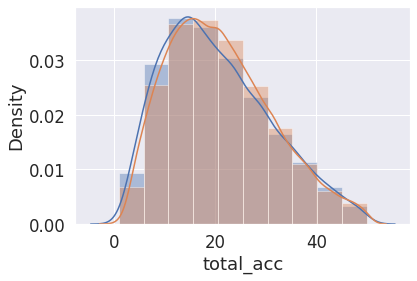

In [ ]:
sns.distplot(df[df['loan_status']==0]['total_acc'], bins=10)
sns.distplot(df[df['loan_status']==1]['total_acc'], bins=10)

In [ ]:
#grade
df.grade.unique()

['B', 'C', 'A', 'E', 'F', 'D', 'G']
Categories (7, object): ['B', 'C', 'A', 'E', 'F', 'D', 'G']

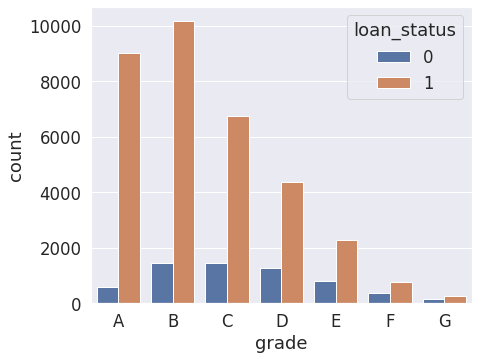

In [ ]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
grade_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
g = sns.countplot(x='grade', data=df, hue='loan_status', order=grade_list)

In [ ]:
for g in df.grade.unique():
    print(f"Grade: {g}")
    print(f"{df[df.grade == g].loan_status.value_counts(normalize=True)}")
    print('________________________________________')

Grade: B
1    0.875516
0    0.124484
Name: loan_status, dtype: float64
________________________________________
Grade: C
1    0.82373
0    0.17627
Name: loan_status, dtype: float64
________________________________________
Grade: A
1    0.938701
0    0.061299
Name: loan_status, dtype: float64
________________________________________
Grade: E
1    0.736671
0    0.263329
Name: loan_status, dtype: float64
________________________________________
Grade: F
1    0.68
0    0.32
Name: loan_status, dtype: float64
________________________________________
Grade: D
1    0.776019
0    0.223981
Name: loan_status, dtype: float64
________________________________________
Grade: G
1    0.650943
0    0.349057
Name: loan_status, dtype: float64
________________________________________


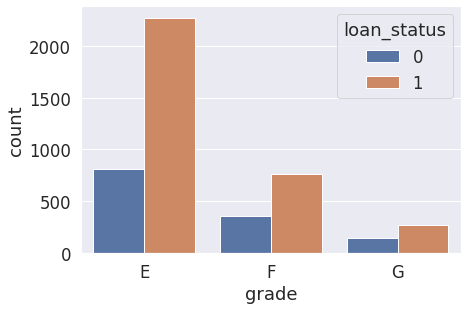

In [ ]:
data = df[(df.grade == 'E') | (df.grade == 'F') | (df.grade == 'G')]

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(data.grade.unique().tolist())
sns.countplot(x='grade', data=data, hue='loan_status', order=grade)

In [ ]:
df2_table=pd.crosstab(df['grade'],df['loan_status'])
print(df2_table)

loan_status     0      1
grade                   
A             590   9035
B            1447  10177
C            1447   6762
D            1259   4362
E             810   2266
F             360    765
G             148    276


In [ ]:
stat, p, dof, expected = chi2_contingency(df2_table)
print('dof=%d' % dof)
print(expected)

prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=6
[[1469.30095205 8155.69904795]
 [1774.45758614 9849.54241386]
 [1253.14197562 6955.85802438]
 [ 858.07175599 4762.92824401]
 [ 469.56568608 2606.43431392]
 [ 171.73647491  953.26352509]
 [  64.72556921  359.27443079]]
probability=0.950, critical=12.592, stat=1610.087
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


In [ ]:
#purpose
df.purpose.nunique()

14

In [ ]:
df.purpose.value_counts()

debt_consolidation    18597
credit_card            5117
other                  4132
home_improvement       2806
major_purchase         2181
small_business         1806
car                    1543
wedding                 967
medical                 690
moving                  598
educational             403
house                   389
vacation                381
renewable_energy         94
Name: purpose, dtype: int64

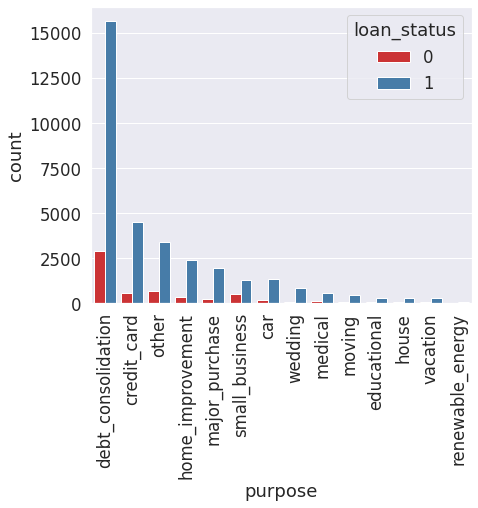

In [ ]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
purpose_list = ['debt_consolidation', 'credit_card', 'other', 'home_improvement', 'major_purchase', 'small_business', 
          'car', 'wedding', 'medical', 'moving', 'educational', 'house', 'vacation', 'renewable_energy',]
p = sns.countplot(x='purpose', data=df, hue='loan_status', order=purpose_list, palette='Set1')
p.set_xticklabels(p.get_xticklabels(), rotation=90);

In [ ]:
pu1 = df[(df['purpose'] == 'debt_consolidation') & (df['loan_status'] == 1)].count().loan_status
pu2 = df[(df['purpose'] == 'debt_consolidation') & (df['loan_status'] == 0)].count().loan_status
pu3 = df[(df['purpose'] == 'credit_card') & (df['loan_status'] == 1)].count().loan_status
pu4 = df[(df['purpose'] == 'credit_card') & (df['loan_status'] == 0)].count().loan_status
pu5 = df[(df['purpose'] == 'other') & (df['loan_status'] == 1)].count().loan_status
pu6 = df[(df['purpose'] == 'other') & (df['loan_status'] == 0)].count().loan_status
pu7 = df[(df['purpose'] == 'home_improvement') & (df['loan_status'] == 1)].count().loan_status
pu8 = df[(df['purpose'] == 'home_improvement') & (df['loan_status'] == 0)].count().loan_status
pu9 = df[(df['purpose'] == 'major_purchase') & (df['loan_status'] == 1)].count().loan_status
pu10 = df[(df['purpose'] == 'major_purchase') & (df['loan_status'] == 0)].count().loan_status
pu11 = df[(df['purpose'] == 'small_business') & (df['loan_status'] == 1)].count().loan_status
pu12 = df[(df['purpose'] == 'small_business') & (df['loan_status'] == 0)].count().loan_status

In [ ]:
pup1 = round(pu1*100 / len(df[(df['loan_status'] == 1)]), 2)
pup2 = round(pu2*100 / len(df[(df['loan_status'] == 0)]), 2)
pup3 = round(pu3*100 / len(df[(df['loan_status'] == 1)]), 2)
pup4 = round(pu4*100 / len(df[(df['loan_status'] == 0)]), 2)
pup5 = round(pu5*100 / len(df[(df['loan_status'] == 1)]), 2)
pup6 = round(pu6*100 / len(df[(df['loan_status'] == 0)]), 2)
pup7 = round(pu7*100 / len(df[(df['loan_status'] == 1)]), 2)
pup8 = round(pu8*100 / len(df[(df['loan_status'] == 0)]), 2)
pup9 = round(pu9*100 / len(df[(df['loan_status'] == 1)]), 2)
pup10 = round(pu10*100 / len(df[(df['loan_status'] == 0)]), 2)
pup11 = round(pu11*100 / len(df[(df['loan_status'] == 1)]), 2)
pup12 = round(pu12*100 / len(df[(df['loan_status'] == 0)]), 2)

In [ ]:
purpose_check = pd.DataFrame({'Purpose':['debt_consolidation', 'credit_card', 'other', 'home_improvement', 'major_purchase', 'small_business'], 
                           'Fully_paid':[pup1,pup3,pup5,pup7,pup9,pup11], 
                           'Charged_off':[pup2,pup4,pup6,pup8,pup10,pup12]})
purpose_check

,Purpose,Fully_paid,Charged_off
0,debt_consolidation,46.58,48.26
1,credit_card,13.49,9.57
2,other,10.18,11.68
3,home_improvement,7.20,6.34
4,major_purchase,5.78,3.93
5,small_business,3.87,8.32


WNIOSKI: Z przeprowadzonych analiz wnioskuję:
- im wyższe oprocentowanie pożyczki tym większe prawdopodobieństwo, że nie będzie ona spłacona
- im wyższa wartośc wskaźnika dti, tym większe ryzyko niewykonania zobowiązania
- lista linii kredytowych, cel, na który jest brana pożyczka oraz wskaźnik grade nie wpływają na finalny status kredytu


Sprawdzę odstające wartości w kolumnach numerycznych, które nie były jeszcze analizowane.

In [ ]:
dfcategory.nunique()

term               2
grade              7
emp_length        12
home_ownership     5
purpose           14
dtype: int64

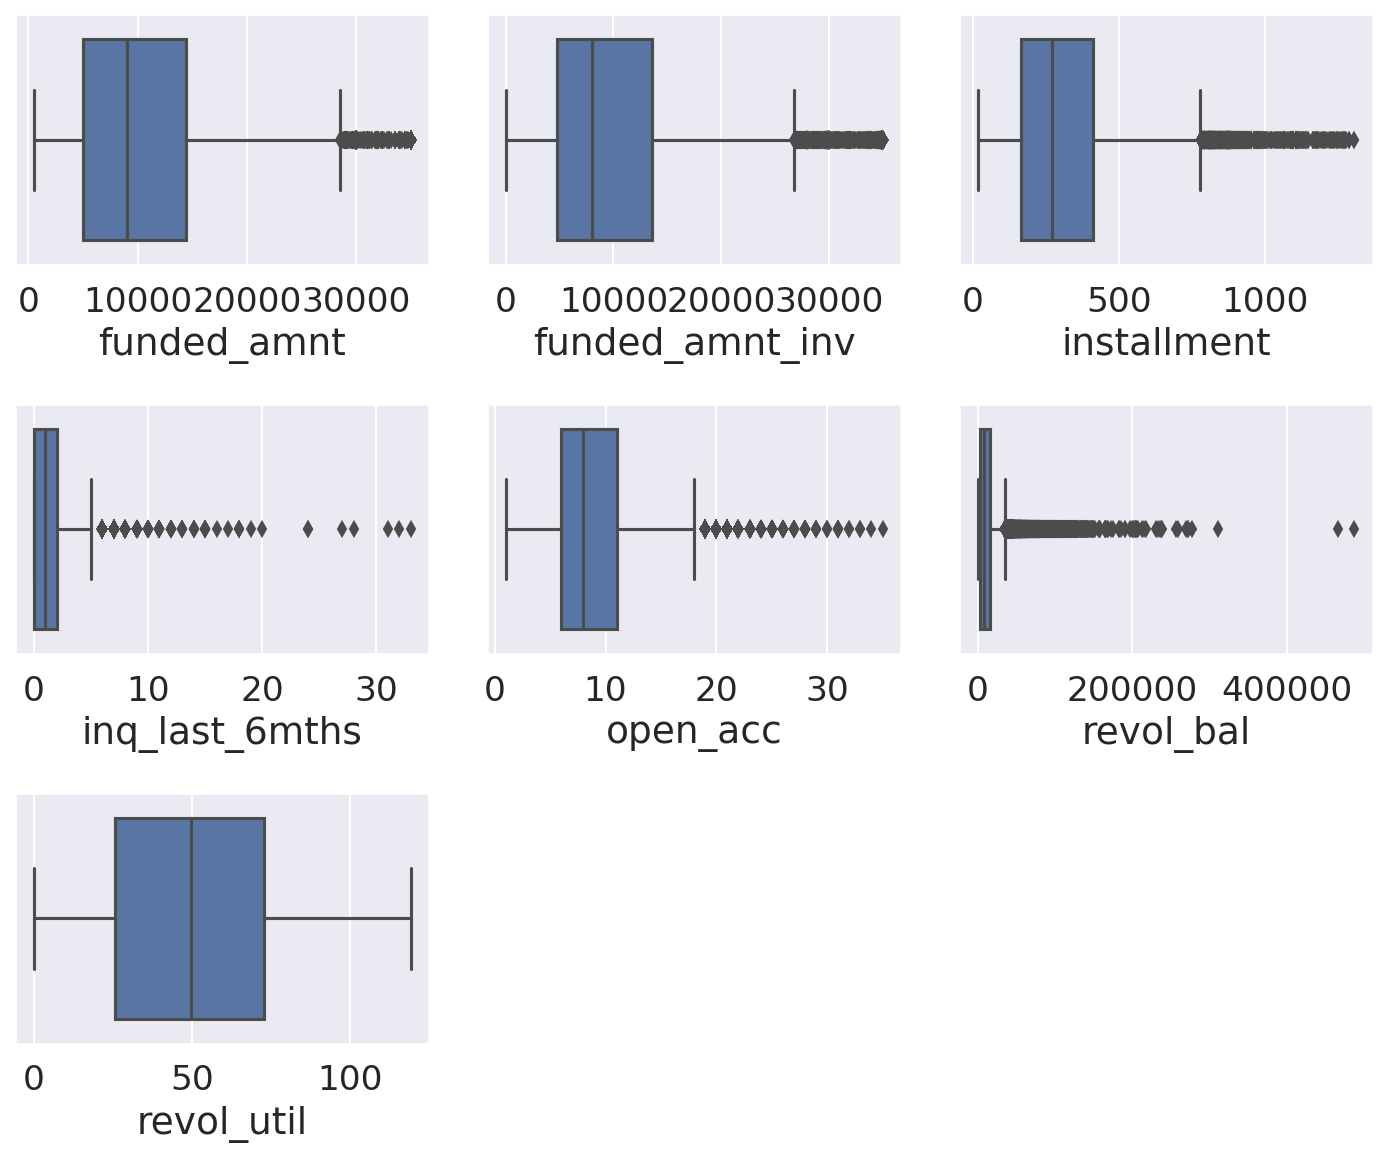

In [ ]:
plt.figure(figsize=(10,10), dpi=150)

plt.subplot(4,3,1)
sns.boxplot(x = 'funded_amnt', data = df)

plt.subplot(4,3,2)
sns.boxplot(x = 'funded_amnt_inv', data = df)

plt.subplot(4,3,3)
sns.boxplot(x = 'installment', data = df)

plt.subplot(4,3,4)
sns.boxplot(x = 'inq_last_6mths', data = df)

plt.subplot(4,3,5)
sns.boxplot(x = 'open_acc', data = df)

plt.subplot(4,3,6)
sns.boxplot(x = 'revol_bal', data = df)

plt.subplot(4,3,7)
sns.boxplot(x = 'revol_util', data = df)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [ ]:
from scipy import stats

z = np.abs(stats.zscore(df[['funded_amnt', 'funded_amnt_inv', 'installment', 'inq_last_6mths', 'open_acc',
       'revol_bal', 'revol_util']]))
print(z)

print("\n")
print("========================================================")
print("\n")

# threshold = 3  # selecting 3 as the threshold to identify outliers
print('Ponizej sa punkty odstajace - nr indeksow i odpowiadające im indeksy kolumn w drugim wektorze')
print("\n")
print(np.where(z > 3))

[[0.79465027 0.70575933 0.74470627 ... 1.43662369 0.05466241 1.21962774]
 [1.159291   1.06764002 1.26200063 ... 1.43662369 0.67531545 1.39981704]
 [1.17387663 1.08226146 1.13900265 ... 1.67377531 0.59786859 1.7414014 ]
 ...
 [0.06536881 1.38200102 0.17054932 ... 1.1720441  0.16644869 1.26545921]
 [0.64879398 1.33813669 0.58199751 ... 0.96232046 0.05539476 0.59561465]
 [0.88216405 1.22847588 0.85324571 ... 1.19947207 0.56509557 0.50747721]]




Ponizej sa punkty odstajace - nr indeksow i odpowiadające im indeksy kolumn w drugim wektorze


(array([   31,    31,    31, ..., 39696, 39697, 39699]), array([0, 1, 2, ..., 3, 3, 3]))


In [ ]:
df.shape

(39704, 23)

In [ ]:
clean_df = df[(z<3).all(axis=1)]
clean_df.shape

(37430, 23)

# Feature Engineering 🛠

### Spojrzenie na nowy zestaw danych clean_df

In [ ]:
clean_df.shape

(37430, 23)

In [ ]:
clean_df.isna().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
home_ownership          0
annual_inc              0
loan_status             0
purpose                 0
dti                     0
delinq_2yrs             0
fico_range              0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
acc_now_delinq          0
pub_rec_bankruptcies    0
tax_liens               0
dtype: int64

In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37430 entries, 0 to 42514
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   loan_amnt             37430 non-null  float64 
 1   funded_amnt           37430 non-null  float64 
 2   funded_amnt_inv       37430 non-null  float64 
 3   term                  37430 non-null  category
 4   int_rate              37430 non-null  float64 
 5   installment           37430 non-null  float64 
 6   grade                 37430 non-null  category
 7   home_ownership        37430 non-null  category
 8   annual_inc            37430 non-null  float64 
 9   loan_status           37430 non-null  int64   
 10  purpose               37430 non-null  category
 11  dti                   37430 non-null  float64 
 12  delinq_2yrs           37430 non-null  float64 
 13  fico_range            37430 non-null  float64 
 14  inq_last_6mths        37430 non-null  float64 
 15  op

In [ ]:
clean_df.nunique()

loan_amnt                 842
funded_amnt               978
funded_amnt_inv          7772
term                        2
int_rate                  389
installment             14927
grade                       7
home_ownership              5
annual_inc               4854
loan_status                 2
purpose                    14
dti                      2868
delinq_2yrs                11
fico_range                 43
inq_last_6mths              6
open_acc                   21
pub_rec                     5
revol_bal               19926
revol_util               1102
total_acc                  50
acc_now_delinq              2
pub_rec_bankruptcies        3
tax_liens                   1
dtype: int64

### Nowa kolumna

- nowa kolumna - wskaźnik wypłacalności, który sprawdza, czy klienta stać na pożyczkę

In [ ]:
def zmienna():
  x = 0
  for i in clean_df['term']:
    if i == ' 36 months':
      x = 3
    else:
      x = 6
    return x

In [ ]:
clean_df['solvency_ratio'] = round((clean_df['loan_amnt'] / zmienna()) / clean_df['annual_inc'], 3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
clean_df.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,annual_inc,loan_status,purpose,dti,delinq_2yrs,fico_range,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,pub_rec_bankruptcies,tax_liens,solvency_ratio
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,RENT,24000.0,1,credit_card,27.65,0.0,739.0,1.0,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,0.0,0.069
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,RENT,30000.0,0,car,1.00,0.0,744.0,5.0,3.0,0.0,1687.0,9.4,4.0,0.0,0.0,0.0,0.028
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,RENT,12252.0,1,small_business,8.72,0.0,739.0,2.0,2.0,0.0,2956.0,98.5,10.0,0.0,0.0,0.0,0.065
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,RENT,49200.0,1,other,20.00,0.0,694.0,1.0,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,0.0,0.068
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,RENT,80000.0,1,other,17.94,0.0,699.0,0.0,15.0,0.0,27783.0,53.9,38.0,0.0,0.0,0.0,0.012


### Kodowanie

Wykonuję kodowanie za pomocą "getdummies" wartości kategorycznych

In [ ]:
clean_df = pd.get_dummies(data=clean_df, drop_first=True, prefix='new')

In [ ]:
clean_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,fico_range,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,pub_rec_bankruptcies,tax_liens,solvency_ratio,new_ 60 months,new_B,new_C,new_D,new_E,new_F,new_G,new_NONE,new_OTHER,new_OWN,new_RENT,new_credit_card,new_debt_consolidation,new_educational,new_home_improvement,new_house,new_major_purchase,new_medical,new_moving,new_other,new_renewable_energy,new_small_business,new_vacation,new_wedding
0,5000.0,5000.0,4975.0,10.65,162.87,24000.0,1,27.65,0.0,739.0,1.0,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,0.0,0.069,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2500.0,2500.0,2500.0,15.27,59.83,30000.0,0,1.00,0.0,744.0,5.0,3.0,0.0,1687.0,9.4,4.0,0.0,0.0,0.0,0.028,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400.0,2400.0,2400.0,15.96,84.33,12252.0,1,8.72,0.0,739.0,2.0,2.0,0.0,2956.0,98.5,10.0,0.0,0.0,0.0,0.065,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,10000.0,10000.0,10000.0,13.49,339.31,49200.0,1,20.00,0.0,694.0,1.0,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,0.0,0.068,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3000.0,3000.0,3000.0,12.69,67.79,80000.0,1,17.94,0.0,699.0,0.0,15.0,0.0,27783.0,53.9,38.0,0.0,0.0,0.0,0.012,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


### Skalowanie - Standaryzacja

Tworzę nową tablicę, która będzie zawierać dane przeskalowane, której będę używać do klasteryzacji oraz PCA

In [ ]:
scaler = StandardScaler()
clean_df_scale = clean_df.copy()
clean_df_scale[['loan_amnt', 'funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti',
          'delinq_2yrs','fico_range','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util',
          'total_acc','acc_now_delinq','pub_rec_bankruptcies','tax_liens', 'solvency_ratio']] = scaler.fit_transform(clean_df_scale[['loan_amnt', 'funded_amnt',
                                                                                                                               'funded_amnt_inv','int_rate','installment','annual_inc','dti',
                                                                                                                               'delinq_2yrs','fico_range','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util',
                                                                                                                               'total_acc','acc_now_delinq','pub_rec_bankruptcies','tax_liens', 'solvency_ratio']])
clean_df_scale.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,fico_range,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,pub_rec_bankruptcies,tax_liens,solvency_ratio,new_ 60 months,new_B,new_C,new_D,new_E,new_F,new_G,new_NONE,new_OTHER,new_OWN,new_RENT,new_credit_card,new_debt_consolidation,new_educational,new_home_improvement,new_house,new_major_purchase,new_medical,new_moving,new_other,new_renewable_energy,new_small_business,new_vacation,new_wedding
0,-0.811507,-0.809377,-0.719807,-0.366583,-0.750406,-1.293581,1,2.128219,-0.297379,0.615387,0.050384,-1.478823,-0.241923,0.238660,1.221507,-1.144918,-0.008953,-0.21793,0.0,0.151467,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,-1.194731,-1.210450,-1.117485,0.908270,-1.316939,-1.074943,0,-1.843041,-0.297379,0.754411,3.494898,-1.478823,-0.241923,-0.886131,-1.397547,-1.638130,-0.008953,-0.21793,0.0,-0.917441,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-1.210060,-1.226493,-1.133552,1.098670,-1.182233,-1.721676,1,-0.692643,-0.297379,0.615387,0.911513,-1.731868,-0.241923,-0.766797,1.743202,-1.046276,-0.008953,-0.21793,0.0,0.047183,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,-0.045059,-0.007231,0.087599,0.417093,0.219694,-0.375298,1,0.988251,-0.297379,-0.635830,0.050384,0.292492,-0.241923,-0.518348,-0.988651,1.617068,-0.008953,-0.21793,0.0,0.125396,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,-1.118086,-1.130235,-1.037146,0.196339,-1.273173,0.747048,1,0.681279,-0.297379,-0.496806,-0.810745,1.557718,-0.241923,1.567889,0.171065,1.715710,-0.008953,-0.21793,0.0,-1.334576,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


#Modelowanie 🤖

Podział zbioru bez standaryzacji clean_df na treningowy i testowy:

In [ ]:
X = clean_df.drop('loan_status',axis =1)  
y = clean_df['loan_status']

print(X.shape)
print(y.shape)

(37430, 43)
(37430,)


In [ ]:
X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,pub_rec_bankruptcies,tax_liens,solvency_ratio,new_ 60 months,new_B,new_C,new_D,new_E,new_F,new_G,new_NONE,new_OTHER,new_OWN,new_RENT,new_credit_card,new_debt_consolidation,new_educational,new_home_improvement,new_house,new_major_purchase,new_medical,new_moving,new_other,new_renewable_energy,new_small_business,new_vacation,new_wedding
0,5000.0,5000.0,4975.0,10.65,162.87,24000.0,27.65,0.0,739.0,1.0,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,0.0,0.069,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2500.0,2500.0,2500.0,15.27,59.83,30000.0,1.00,0.0,744.0,5.0,3.0,0.0,1687.0,9.4,4.0,0.0,0.0,0.0,0.028,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400.0,2400.0,2400.0,15.96,84.33,12252.0,8.72,0.0,739.0,2.0,2.0,0.0,2956.0,98.5,10.0,0.0,0.0,0.0,0.065,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,10000.0,10000.0,10000.0,13.49,339.31,49200.0,20.00,0.0,694.0,1.0,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,0.0,0.068,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3000.0,3000.0,3000.0,12.69,67.79,80000.0,17.94,0.0,699.0,0.0,15.0,0.0,27783.0,53.9,38.0,0.0,0.0,0.0,0.012,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (28072, 43)
X_test shape: (9358, 43)
y_train shape: (28072,)
y_test shape: (9358,)


Sprawdzam, czy zbiór testowy i treningowy są podzielone równomiernie

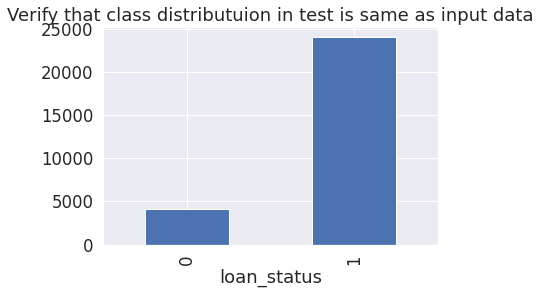

In [ ]:
X_train.pivot_table(index=clean_df['loan_status'], aggfunc='size').plot(kind='bar', title='Verify that class distributuion in test is same as input data')

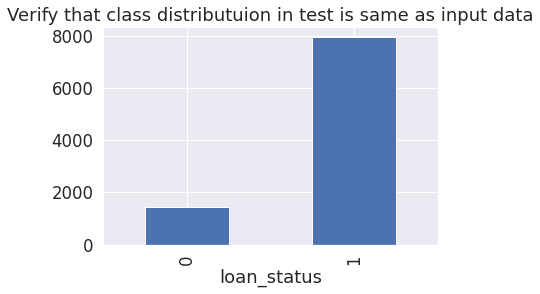

In [ ]:
X_test.pivot_table(index=clean_df['loan_status'], aggfunc='size').plot(kind='bar', title='Verify that class distributuion in test is same as input data')

Ponieważ dane targetowe w zbiorze nie są zbalansowane wykorzystam metodę SMOTE, aby zrównoważyć zbiór treningowy

In [ ]:
from collections import Counter
Counter(y_train)

Counter({0: 4102, 1: 23970})

In [ ]:
sm = SMOTE(random_state = 42)
X_res, y_res = sm.fit_resample(X_train, y_train)

Counter(y_res)

Counter({0: 23970, 1: 23970})

➡ Zbiór danych clean_df_scale

---

Ponieważ klasteryzacja jest zbyt wymagająca jeśli chodzi o zasoby konieczne jest zmniejszenie zbioru:

In [ ]:
df_small = clean_df_scale.iloc[:10000]
df_small.shape

(10000, 44)

In [ ]:
X_small = df_small.drop('loan_status',axis =1)  
y_small = df_small['loan_status']

print(X_small.shape)
print(y_small.shape)

(10000, 43)
(10000,)


## 1. Klasteryzacja danych

- algorytm KMEANS
---

Dopasowanie modelu do danych

In [ ]:
kmeans = KMeans(n_clusters=4, max_iter=1000, random_state=42)
kmeans.fit(X_small)

KMeans(max_iter=1000, n_clusters=4, random_state=42)

In [ ]:
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

Optymalizacja liczby klastrów

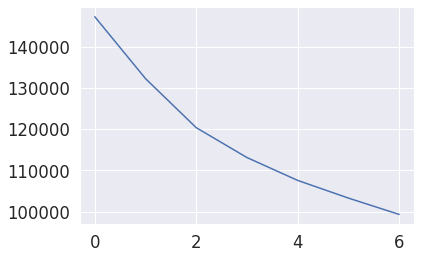

In [ ]:
# metoda łokcia - elbow-curve
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000, random_state=42)
    kmeans.fit(X_small)
    
    ssd.append(kmeans.inertia_)
    
plt.plot(ssd)

Na podstawie metody łokcia wydaje się, że najlepszą wartością dla k będzie 2. Sprawdzę to jeszcze za pomocą wskaźnika sylwetkowego

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000, random_state=42)
    kmeans.fit(X_small)
    
    cluster_labels = kmeans.labels_

    silhouette_avg = silhouette_score(X_small, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.19867631116110596
For n_clusters=3, the silhouette score is 0.2171368672344082
For n_clusters=4, the silhouette score is 0.1524063013676381
For n_clusters=5, the silhouette score is 0.12812315544001682
For n_clusters=6, the silhouette score is 0.12532642777301242
For n_clusters=7, the silhouette score is 0.12869326321303698
For n_clusters=8, the silhouette score is 0.120594366326013


Najwyższa wartość wskaźnika silhouette została uzyskana przy k=3, choć dla k=2 wartość też jest całkiem spora, zatem na podstawie wyników z tych dwóch metod ostatecznie wybieram k=2

In [ ]:
kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=42)
kmeans.fit(X_small)

KMeans(max_iter=1000, n_clusters=2, random_state=42)

In [ ]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

Dodam kolumnę z numerami klastrów do zbioru danych, aby porównać je z tymi uzyskanymi w przypadku klasteryzacji hierarchicznej

In [ ]:
df_small['KMeans_Cluster'] = kmeans.labels_

In [ ]:
df_small.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,fico_range,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,pub_rec_bankruptcies,tax_liens,solvency_ratio,new_ 60 months,new_B,new_C,new_D,new_E,new_F,new_G,new_NONE,new_OTHER,new_OWN,new_RENT,new_credit_card,new_debt_consolidation,new_educational,new_home_improvement,new_house,new_major_purchase,new_medical,new_moving,new_other,new_renewable_energy,new_small_business,new_vacation,new_wedding,KMeans_Cluster
0,-0.811507,-0.809377,-0.719807,-0.366583,-0.750406,-1.293581,1,2.128219,-0.297379,0.615387,0.050384,-1.478823,-0.241923,0.238660,1.221507,-1.144918,-0.008953,-0.21793,0.0,0.151467,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-1.194731,-1.210450,-1.117485,0.908270,-1.316939,-1.074943,0,-1.843041,-0.297379,0.754411,3.494898,-1.478823,-0.241923,-0.886131,-1.397547,-1.638130,-0.008953,-0.21793,0.0,-0.917441,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-1.210060,-1.226493,-1.133552,1.098670,-1.182233,-1.721676,1,-0.692643,-0.297379,0.615387,0.911513,-1.731868,-0.241923,-0.766797,1.743202,-1.046276,-0.008953,-0.21793,0.0,0.047183,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,-0.045059,-0.007231,0.087599,0.417093,0.219694,-0.375298,1,0.988251,-0.297379,-0.635830,0.050384,0.292492,-0.241923,-0.518348,-0.988651,1.617068,-0.008953,-0.21793,0.0,0.125396,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,-1.118086,-1.130235,-1.037146,0.196339,-1.273173,0.747048,1,0.681279,-0.297379,-0.496806,-0.810745,1.557718,-0.241923,1.567889,0.171065,1.715710,-0.008953,-0.21793,0.0,-1.334576,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


Sprawdzam, jak KMeans podzielił zbiór w odniesieniu np. do wskaźnika FICO

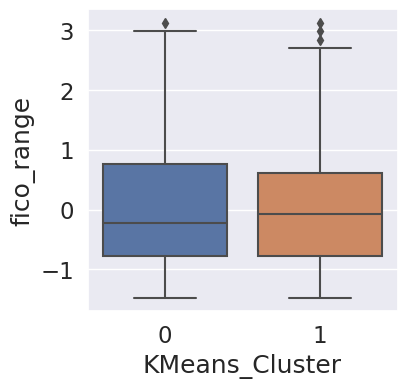

In [ ]:
plt.figure(figsize=(4,4),dpi=100)
sns.boxplot(x='KMeans_Cluster', y='fico_range', data=df_small)

Sprawdzam, jak zbalansowany jest nowo powstały zbiór etykiet

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


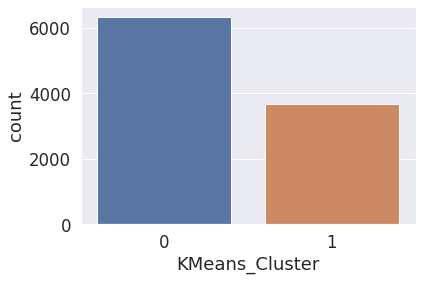

In [ ]:
sns.countplot(df_small['KMeans_Cluster'])

- klasteryzacja hierarchiczna
---

Dopasowanie modelu do danych (wybieram metodę "complete", która działa dość szybko i daje ciekawe wyniki)

In [ ]:
cl_linked = linkage(X_small, method="complete", metric='euclidean')

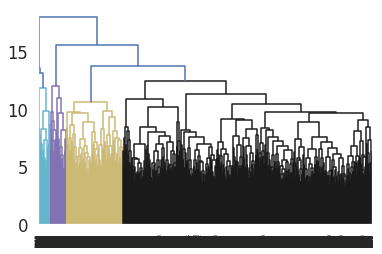

In [ ]:
dendrogram(cl_linked)
plt.show()

In [ ]:
cl_linked_labels = cut_tree(cl_linked, n_clusters=4).reshape(-1, )
cl_linked_labels

array([0, 0, 0, ..., 0, 0, 0])

Dodaję kolumnę z nowymi etykietami do tabeli

In [ ]:
df_small['Hierarchical_Cluster'] = cl_linked_labels
df_small.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,fico_range,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,pub_rec_bankruptcies,tax_liens,solvency_ratio,new_ 60 months,new_B,new_C,new_D,new_E,new_F,new_G,new_NONE,new_OTHER,new_OWN,new_RENT,new_credit_card,new_debt_consolidation,new_educational,new_home_improvement,new_house,new_major_purchase,new_medical,new_moving,new_other,new_renewable_energy,new_small_business,new_vacation,new_wedding,Hierarchical_Cluster
0,-0.811507,-0.809377,-0.719807,-0.366583,-0.750406,-1.293581,1,2.128219,-0.297379,0.615387,0.050384,-1.478823,-0.241923,0.238660,1.221507,-1.144918,-0.008953,-0.21793,0.0,0.151467,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-1.194731,-1.210450,-1.117485,0.908270,-1.316939,-1.074943,0,-1.843041,-0.297379,0.754411,3.494898,-1.478823,-0.241923,-0.886131,-1.397547,-1.638130,-0.008953,-0.21793,0.0,-0.917441,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-1.210060,-1.226493,-1.133552,1.098670,-1.182233,-1.721676,1,-0.692643,-0.297379,0.615387,0.911513,-1.731868,-0.241923,-0.766797,1.743202,-1.046276,-0.008953,-0.21793,0.0,0.047183,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,-0.045059,-0.007231,0.087599,0.417093,0.219694,-0.375298,1,0.988251,-0.297379,-0.635830,0.050384,0.292492,-0.241923,-0.518348,-0.988651,1.617068,-0.008953,-0.21793,0.0,0.125396,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,-1.118086,-1.130235,-1.037146,0.196339,-1.273173,0.747048,1,0.681279,-0.297379,-0.496806,-0.810745,1.557718,-0.241923,1.567889,0.171065,1.715710,-0.008953,-0.21793,0.0,-1.334576,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


Sprawdzam, jak klasteryzacja hierarchiczna podzieliła zbiór w odniesieniu do FICO

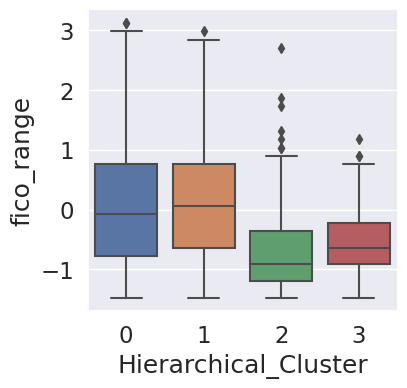

In [ ]:
plt.figure(figsize=(4,4),dpi=100)
sns.boxplot(x='Hierarchical_Cluster', y='fico_range', data=df_small)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


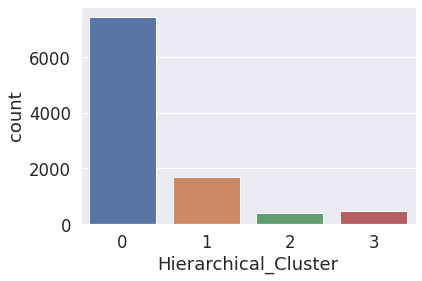

In [ ]:
sns.countplot(df_small['Hierarchical_Cluster'])

Ponieważ te nowe kolumny nie będą mi potrzebne w procesie dalszej analizy a mogą wręcz wprowadzać szumy, usunę je

In [ ]:
df_small = df_small.drop(axis=1, columns=['KMeans_Cluster','Hierarchical_Cluster'])

- DBScan
---

Dopasowanie modelu do danych

In [ ]:
clt = DBSCAN(eps=2, metric='euclidean', min_samples=5, n_jobs=-1)
model = clt.fit(X_small)

In [ ]:
clt.labels_

array([ 0, -1, -1, ...,  0, -1, -1])

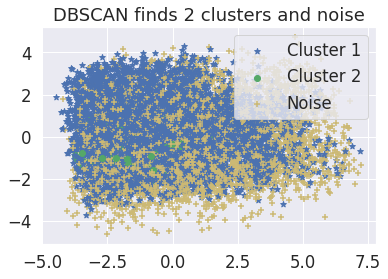

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X_small)
pca_2d = pca.transform(X_small)
for i in range(0, pca_2d.shape[0]):
    if clt.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='*')
    elif clt.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif clt.labels_[i] == -1:
            c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='y', marker='+')
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('DBSCAN finds 2 clusters and noise')
plt.show()

Dobór najlepszej wartości parametru eps

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_small)
distances, indices = nbrs.kneighbors(X_small)

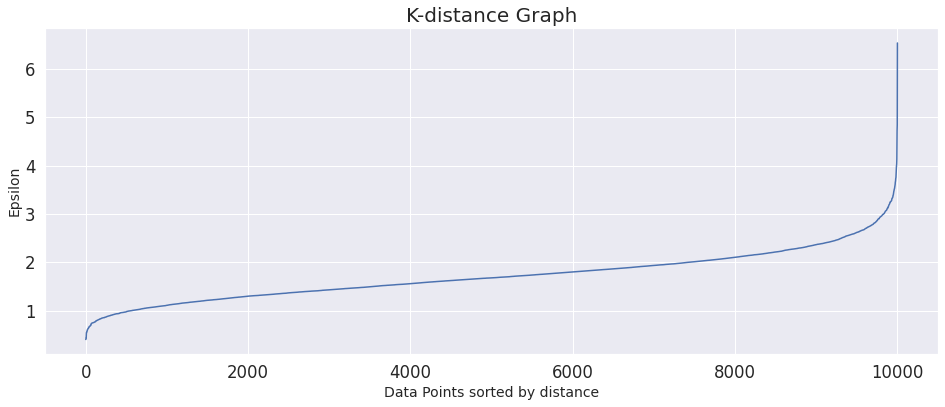

In [ ]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(16,6))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

Dopasowanie modelu przy eps=3

In [ ]:
clt = DBSCAN(eps=3, metric='euclidean', min_samples=5, n_jobs=-1)
model = clt.fit(X_small)

In [ ]:
clt.labels_

array([ 0, -1,  0, ...,  0,  0,  0])

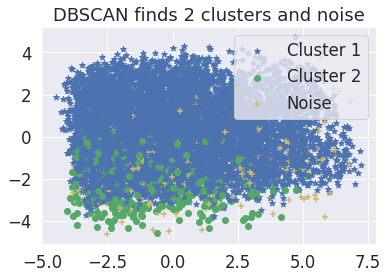

In [ ]:
pca = PCA(n_components=2).fit(X_small)
pca_2d = pca.transform(X_small)
for i in range(0, pca_2d.shape[0]):
    if clt.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='*')
    elif clt.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif clt.labels_[i] == -1:
            c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='y', marker='+')
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('DBSCAN finds 2 clusters and noise')
plt.show()

## 2. 5 różnych modeli uczenia nadzorowanego

### 1. LOGIT

Dopasowanie moedlu

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 42)
lr.fit(X_res, y_res)
lr.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.607715323787134

Predykcja

In [ ]:
lr_prediction = lr.predict(X_test)

Funkcja do evaluacji, która będzie wykorzystywana przy kolejnych modelach

In [ ]:
def evaluate(prediction,y_test): 
    result = classification_report(y_test,prediction,output_dict=True)
    f1 = result['1']['f1-score']
    accuracy = result['accuracy']
    performance_data= {'f1-score':round(f1, 2),
                      'accuracy':round(accuracy, 2)}
    return performance_data

Ocena jakości modelu:
  1. f1-score oraz accuracy
  2. AUC-ROC

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score
print(classification_report(y_test,lr_prediction))
lr_pr = evaluate(lr_prediction,y_test)
print(lr_pr)

              precision    recall  f1-score   support

           0       0.22      0.60      0.32      1428
           1       0.89      0.61      0.72      7930

    accuracy                           0.61      9358
   macro avg       0.56      0.61      0.52      9358
weighted avg       0.79      0.61      0.66      9358

{'f1-score': 0.72, 'accuracy': 0.61}


In [ ]:
from sklearn.metrics import roc_auc_score
lr_auc_roc = roc_auc_score(y_test, lr_prediction)
print('AUC-ROC:', round(lr_auc_roc, 2))

AUC-ROC: 0.61


### 2. Random forest classifier

Dopasowanie modelu

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state = 42)
rf.fit(X_res, y_res)
rf.score(X_test,y_test)

0.8389613165206241

Predykcja

In [ ]:
rf_prediction = rf.predict(X_test)

Ocena modelu

In [ ]:
print(classification_report(y_test,rf_prediction))
rf_pr = evaluate(rf_prediction,y_test)
print(rf_pr)

              precision    recall  f1-score   support

           0       0.31      0.05      0.08      1428
           1       0.85      0.98      0.91      7930

    accuracy                           0.84      9358
   macro avg       0.58      0.51      0.50      9358
weighted avg       0.77      0.84      0.79      9358

{'f1-score': 0.91, 'accuracy': 0.84}


In [ ]:
rf_auc_roc = roc_auc_score(y_test, rf_prediction)
print('AUC-ROC:', round(rf_auc_roc, 2))

AUC-ROC: 0.51


### 3. Bagging (Decision Tree)

Dopasowanie modelu

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
bagging = BaggingClassifier(tree.DecisionTreeClassifier(random_state=42))
bagging.fit(X_res, y_res)
bagging.score(X_test,y_test)

0.8040179525539646

Predykcja

In [ ]:
bagging_prediction = bagging.predict(X_test)

Ocena modelu:

In [ ]:
print(classification_report(y_test,bagging_prediction))
bagging_pr = evaluate(bagging_prediction,y_test)
print(bagging_pr)

              precision    recall  f1-score   support

           0       0.25      0.14      0.18      1428
           1       0.86      0.92      0.89      7930

    accuracy                           0.80      9358
   macro avg       0.55      0.53      0.53      9358
weighted avg       0.76      0.80      0.78      9358

{'f1-score': 0.89, 'accuracy': 0.8}


In [ ]:
bagging_auc_roc = roc_auc_score(y_test, bagging_prediction)
print('AUC-ROC:', round(bagging_auc_roc, 2))

AUC-ROC: 0.53


### 4. AdaBoost

Dopasowanie modelu:

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaB = AdaBoostClassifier(random_state=42)
adaB.fit(X_res, y_res)
adaB.score(X_test,y_test)

0.8167343449455011

Predykcja

In [ ]:
adaB_prediction = adaB.predict(X_test)

Ocena modelu

In [ ]:
print(classification_report(y_test,adaB_prediction))
adaB_pr = evaluate(adaB_prediction,y_test)
print(adaB_pr)

              precision    recall  f1-score   support

           0       0.22      0.08      0.12      1428
           1       0.85      0.95      0.90      7930

    accuracy                           0.82      9358
   macro avg       0.54      0.52      0.51      9358
weighted avg       0.76      0.82      0.78      9358

{'f1-score': 0.9, 'accuracy': 0.82}


In [ ]:
adaB_auc_roc = roc_auc_score(y_test, adaB_prediction)
print('AUC-ROC:', round(adaB_auc_roc, 2))

AUC-ROC: 0.52


### 5. XGBoost

In [ ]:
!pip3 install xgboost

In [ ]:
import xgboost as xgb

Dopasowanie modelu

In [ ]:
xgb_class=xgb.XGBClassifier(random_state=42)
xgb_class.fit(X_res, y_res)
xgb_class.score(X_test,y_test)

0.8318016670228682

Predykcja

In [ ]:
xgb_class_prediction = xgb_class.predict(X_test)

Ocena modelu

In [ ]:
print(classification_report(y_test,xgb_class_prediction))
xgb_class_pr = evaluate(xgb_class_prediction,y_test)
print(xgb_class_pr)

              precision    recall  f1-score   support

           0       0.29      0.07      0.12      1428
           1       0.85      0.97      0.91      7930

    accuracy                           0.83      9358
   macro avg       0.57      0.52      0.51      9358
weighted avg       0.77      0.83      0.79      9358

{'f1-score': 0.91, 'accuracy': 0.83}


In [ ]:
xgb_class_auc_roc = roc_auc_score(y_test, xgb_class_prediction)
print('AUC-ROC:', round(xgb_class_auc_roc, 2))

AUC-ROC: 0.52


### Porównanie wyników:

In [ ]:
prediction_data={'Model':['LOGIT',
                          'Random Forest',
                          'Bagging using Decision Tree',
                          'AdaBoost',
                          'XGBoost'
                         ],
                   'F1-score':[lr_pr['f1-score'],
                              rf_pr['f1-score'],
                              bagging_pr['f1-score'],
                              adaB_pr['f1-score'],
                              xgb_class_pr['f1-score']],
                 
                   'Accuracy':[lr_pr['accuracy'],
                              rf_pr['accuracy'],
                              bagging_pr['accuracy'],
                              adaB_pr['accuracy'],
                              xgb_class_pr['accuracy']],
                 
                   'AUC_ROC':[round(lr_auc_roc, 2),
                              round(rf_auc_roc, 2),
                              round(bagging_auc_roc, 2),
                              round(adaB_auc_roc, 2),
                              round(xgb_class_auc_roc, 2)]
                    }
 

prediction_table = pd.DataFrame(prediction_data)
prediction_table

,Model,F1-score,Accuracy,AUC_ROC
0,LOGIT,0.72,0.61,0.61
1,Random Forest,0.91,0.84,0.51
2,Bagging using Decision Tree,0.89,0.80,0.53
3,AdaBoost,0.90,0.82,0.52
4,XGBoost,0.91,0.84,0.52


Biorąc pod uwagę AUROC score na tym etapie najlepiej wypada model regresji logistycznej

## 3. Modele na danych skompresowanych za pomocą PCA

### Redukcja wymiarowości

Podział zbioru przeskalowanego: clean_df_scale:

In [ ]:
X_scale = clean_df_scale.drop('loan_status',axis =1)  
y_scale = clean_df_scale['loan_status']

print(X_scale.shape)
print(y_scale.shape)

(37430, 43)
(37430,)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(X_scale)

PCA(random_state=42)

In [ ]:
pca.explained_variance_ratio_

array([2.46344946e-01, 1.24336689e-01, 1.06594081e-01, 8.88080993e-02,
       6.60759800e-02, 5.99110413e-02, 5.07659666e-02, 4.89201867e-02,
       3.32598904e-02, 2.57579143e-02, 1.94809739e-02, 1.87535662e-02,
       1.30997125e-02, 1.20846201e-02, 1.18630683e-02, 1.08742414e-02,
       8.38006630e-03, 8.24712988e-03, 6.49329665e-03, 5.63582350e-03,
       4.96543803e-03, 4.58908479e-03, 3.93926707e-03, 3.24134605e-03,
       3.03878175e-03, 2.82432711e-03, 2.34313071e-03, 1.76836198e-03,
       1.47137447e-03, 1.30696826e-03, 1.02311477e-03, 8.17135431e-04,
       5.97646433e-04, 5.66284479e-04, 4.89958144e-04, 4.73480058e-04,
       3.41408625e-04, 1.65576468e-04, 1.60295701e-04, 1.02018095e-04,
       8.23263225e-05, 5.38151059e-06, 1.82081558e-33])

In [ ]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.24634495, 0.37068164, 0.47727572, 0.56608382, 0.6321598 ,
       0.69207084, 0.7428368 , 0.79175699, 0.82501688, 0.8507748 ,
       0.87025577, 0.88900934, 0.90210905, 0.91419367, 0.92605674,
       0.93693098, 0.94531104, 0.95355817, 0.96005147, 0.96568729,
       0.97065273, 0.97524182, 0.97918108, 0.98242243, 0.98546121,
       0.98828554, 0.99062867, 0.99239703, 0.99386841, 0.99517537,
       0.99619849, 0.99701562, 0.99761327, 0.99817956, 0.99866951,
       0.99914299, 0.9994844 , 0.99964998, 0.99981027, 0.99991229,
       0.99999462, 1.        , 1.        ])

Dobór optymalnej liczby kolumn

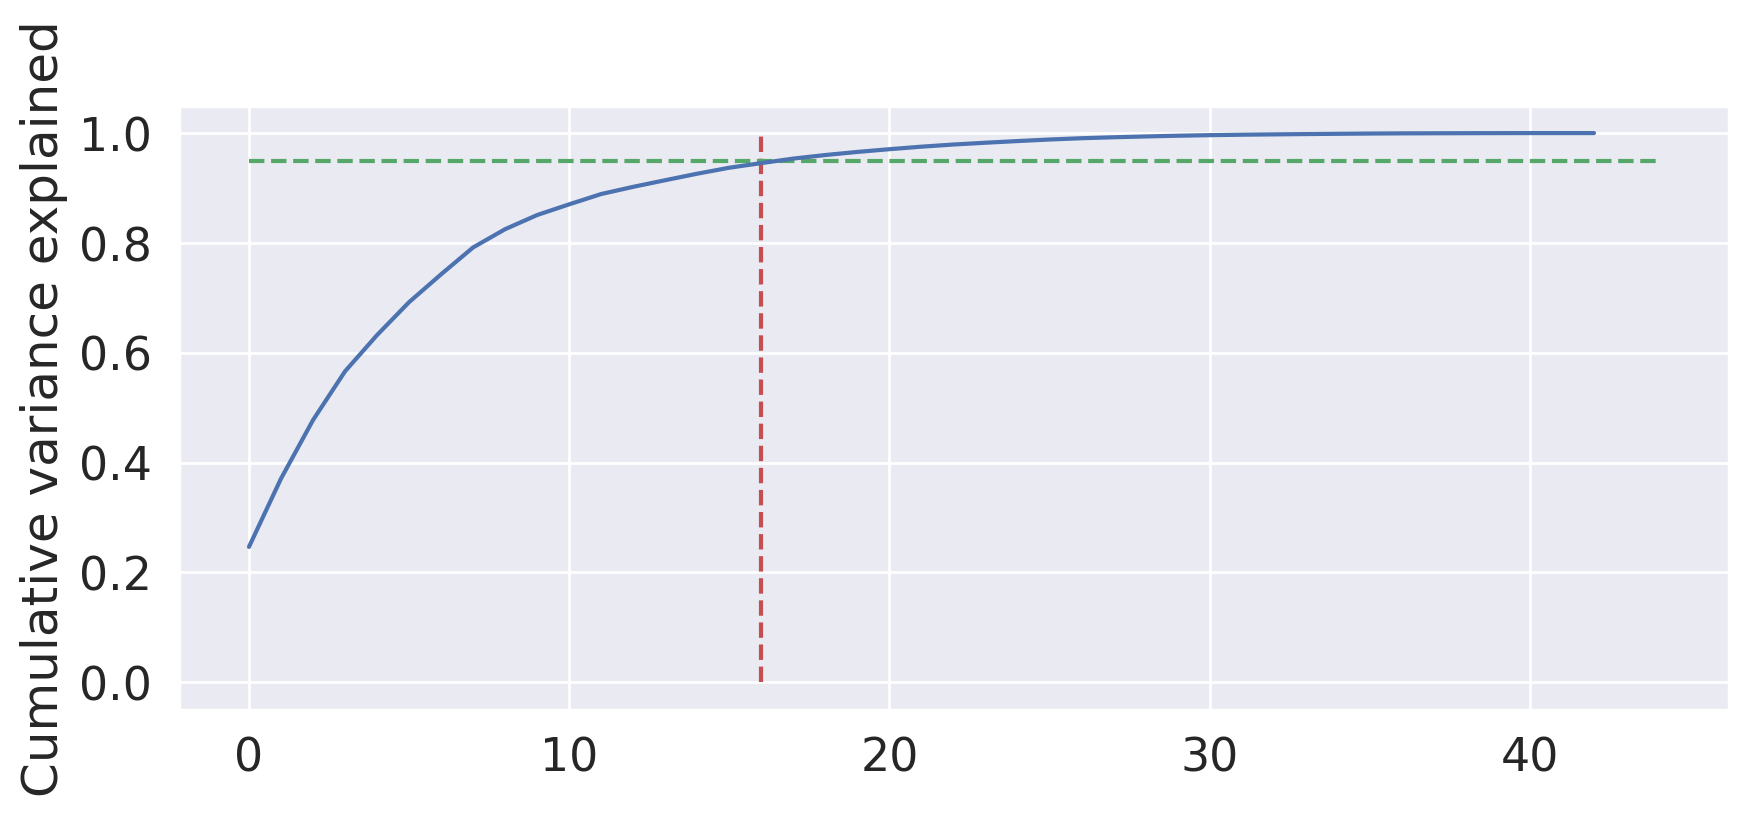

In [ ]:
fig = plt.figure(figsize=[10,4],dpi=200)
plt.vlines(x=16, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=44, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

PCA zredukowało zestaw danych do 17 kolumn

In [ ]:
pca_final = PCA(n_components=17, random_state=42)
X_pca_final = pca_final.fit_transform(X_scale)

In [ ]:
print(X.shape)
print(X_pca_final.shape)

(37430, 43)
(37430, 17)


Podział zredukowanego zbioru na treningowy i testowy

In [ ]:
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca_final, y_scale, test_size=0.25, random_state=42)

print(f'PCA_X_train shape: {X_pca_train.shape}')
print(f'PCA_X_test shape: {X_pca_test.shape}')
print(f'PCA_y_train shape: {y_pca_train.shape}')
print(f'PCA_y_test shape: {y_pca_test.shape}')

PCA_X_train shape: (28072, 17)
PCA_X_test shape: (9358, 17)
PCA_y_train shape: (28072,)
PCA_y_test shape: (9358,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


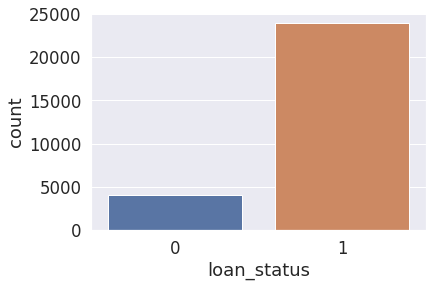

In [ ]:
sns.countplot(y_pca_train)

Balansowanie zbioru za pomocą SMOTE

In [ ]:
sm_pca = SMOTE(random_state = 42)
X_pca_res, y_pca_res = sm.fit_resample(X_pca_train, y_pca_train)

Counter(y_pca_res)

Counter({0: 23970, 1: 23970})

Teraz sprawdzę wybranych 5 modeli na danych skompresowanych za pomocą PCA

### 1. LOGIT po PCA

Dopasowanie modelu

In [ ]:
lr_pca = LogisticRegression(random_state = 42)
lr_pca.fit(X_pca_res, y_pca_res)
lr_pca.score(X_pca_test,y_pca_test)

0.6329343876896772

Predykcja

In [ ]:
lr_pca_prediction = lr_pca.predict(X_pca_test)

Ocena modelu

In [ ]:
print(classification_report(y_pca_test,lr_pca_prediction))
lr_pca_pr = evaluate(lr_pca_prediction,y_pca_test)
print(lr_pca_pr)

              precision    recall  f1-score   support

           0       0.24      0.64      0.35      1428
           1       0.91      0.63      0.74      7930

    accuracy                           0.63      9358
   macro avg       0.57      0.64      0.55      9358
weighted avg       0.81      0.63      0.68      9358

{'f1-score': 0.74, 'accuracy': 0.63}


In [ ]:
lr_pca_auc_roc = roc_auc_score(y_pca_test, lr_pca_prediction)
print('AUC-ROC:', round(lr_pca_auc_roc, 2))

AUC-ROC: 0.64


### 2. Random forest classifier po PCA

Dopasowanie modelu

In [ ]:
rf_pca = RandomForestClassifier(n_estimators=100, random_state = 42)
rf_pca.fit(X_pca_res, y_pca_res)
rf_pca.score(X_pca_test,y_pca_test)

0.784569352425732

Predykcja

In [ ]:
rf_pca_prediction = rf_pca.predict(X_pca_test)

Ocena modelu

In [ ]:
print(classification_report(y_pca_test,rf_pca_prediction))
rf_pca_pr = evaluate(rf_pca_prediction,y_pca_test)
print(rf_pca_pr)

              precision    recall  f1-score   support

           0       0.27      0.23      0.25      1428
           1       0.86      0.88      0.87      7930

    accuracy                           0.78      9358
   macro avg       0.57      0.56      0.56      9358
weighted avg       0.77      0.78      0.78      9358

{'f1-score': 0.87, 'accuracy': 0.78}


In [ ]:
rf_pca_auc_roc = roc_auc_score(y_pca_test, rf_pca_prediction)
print('AUC-ROC:', round(rf_pca_auc_roc, 2))

AUC-ROC: 0.56


### 3. Bagging (Decision Tree) po PCA

Dopasowanie modelu

In [ ]:
bag_pca = BaggingClassifier(tree.DecisionTreeClassifier(random_state=42))
bag_pca.fit(X_pca_res, y_pca_res)
bag_pca.score(X_pca_test,y_pca_test)

0.7046377431075016

Predykcja

In [ ]:
bag_pca_prediction = bag_pca.predict(X_pca_test)

Ocena modelu

In [ ]:
print(classification_report(y_pca_test,bag_pca_prediction))
bag_pca_pr = evaluate(bag_pca_prediction,y_pca_test)
print(bag_pca_pr)

              precision    recall  f1-score   support

           0       0.22      0.37      0.28      1428
           1       0.87      0.76      0.81      7930

    accuracy                           0.70      9358
   macro avg       0.55      0.57      0.55      9358
weighted avg       0.77      0.70      0.73      9358

{'f1-score': 0.81, 'accuracy': 0.7}


In [ ]:
bag_pca_auc_roc = roc_auc_score(y_pca_test, bag_pca_prediction)
print('AUC-ROC:', round(bag_pca_auc_roc, 2))

AUC-ROC: 0.57


### 4. AdaBoost po PCA

Dopasowanie modelu

In [ ]:
adaB_pca = AdaBoostClassifier(random_state=42)
adaB_pca.fit(X_pca_res, y_pca_res)
adaB_pca.score(X_pca_test,y_pca_test)

0.6352853173755076

Predykcja

In [ ]:
adaB_pca_prediction = adaB_pca.predict(X_pca_test)

Ocena modelu

In [ ]:
print(classification_report(y_pca_test,adaB_pca_prediction))
adaB_pca_pr = evaluate(adaB_pca_prediction,y_pca_test)
print(adaB_pca_pr)

              precision    recall  f1-score   support

           0       0.23      0.58      0.33      1428
           1       0.89      0.65      0.75      7930

    accuracy                           0.64      9358
   macro avg       0.56      0.61      0.54      9358
weighted avg       0.79      0.64      0.69      9358

{'f1-score': 0.75, 'accuracy': 0.64}


In [ ]:
adaB_pca_auc_roc = roc_auc_score(y_pca_test, adaB_pca_prediction)
print('AUC-ROC:', round(adaB_pca_auc_roc, 2))

AUC-ROC: 0.61


### 5. XGBoost po PCA

Dopasowanie modelu

In [ ]:
xgb_pca_class=xgb.XGBClassifier(random_state=42)
xgb_pca_class.fit(X_pca_res, y_pca_res)
xgb_pca_class.score(X_pca_test,y_pca_test)

0.6465056636033341

Predykcja

In [ ]:
xgb_pca_class_prediction = xgb_pca_class.predict(X_pca_test)

Ocena modelu

In [ ]:
print(classification_report(y_pca_test,xgb_pca_class_prediction))
xgb_pca_class_pr = evaluate(xgb_pca_class_prediction,y_pca_test)
print(xgb_pca_class_pr)

              precision    recall  f1-score   support

           0       0.24      0.61      0.34      1428
           1       0.90      0.65      0.76      7930

    accuracy                           0.65      9358
   macro avg       0.57      0.63      0.55      9358
weighted avg       0.80      0.65      0.69      9358

{'f1-score': 0.76, 'accuracy': 0.65}


In [ ]:
xgb_pca_class_auc_roc = roc_auc_score(y_pca_test, xgb_pca_class_prediction)
print('AUC-ROC:', round(xgb_pca_class_auc_roc, 2))

AUC-ROC: 0.63


### Porównanie wyników po PCA

In [ ]:
prediction_data_pca={'Model':['LOGIT',
                          'Random Forest',
                          'Bagging using Decision Tree',
                          'AdaBoost',
                          'XGBoost'
                         ],
                   'F1-score_pca':[lr_pca_pr['f1-score'],
                              rf_pca_pr['f1-score'],
                              bag_pca_pr['f1-score'],
                              adaB_pca_pr['f1-score'],
                              xgb_pca_class_pr['f1-score']],
                 
                   'Accuracy_pca':[lr_pca_pr['accuracy'],
                              rf_pca_pr['accuracy'],
                              bag_pca_pr['accuracy'],
                              adaB_pca_pr['accuracy'],
                              xgb_pca_class_pr['accuracy']],
                 
                   'AUC_ROC_pca':[round(lr_pca_auc_roc, 2),
                              round(rf_pca_auc_roc, 2),
                              round(bag_pca_auc_roc, 2),
                              round(adaB_pca_auc_roc, 2),
                              round(xgb_pca_class_auc_roc, 2)]
                    }
 

prediction_table_pca = pd.DataFrame(prediction_data_pca)
prediction_table_pca

,Model,F1-score_pca,Accuracy_pca,AUC_ROC_pca
0,LOGIT,0.74,0.63,0.64
1,Random Forest,0.87,0.78,0.56
2,Bagging using Decision Tree,0.81,0.70,0.57
3,AdaBoost,0.75,0.64,0.61
4,XGBoost,0.76,0.65,0.63


In [ ]:
prediction_table.merge(prediction_table_pca, how='inner', on='Model')

,Model,F1-score,Accuracy,AUC_ROC,F1-score_pca,Accuracy_pca,AUC_ROC_pca
0,LOGIT,0.72,0.61,0.61,0.74,0.63,0.64
1,Random Forest,0.91,0.84,0.51,0.87,0.78,0.56
2,Bagging using Decision Tree,0.89,0.80,0.53,0.81,0.70,0.57
3,AdaBoost,0.90,0.82,0.52,0.75,0.64,0.61
4,XGBoost,0.91,0.84,0.52,0.76,0.65,0.63


## 4. Finalny model

Co prawda najwyższą wartość AUROC score osiągnął model regresji logistycznej po kompresji danych za pomocą PCA, jednak ja patrząc globalnie na wszystkie wyniki wybieram do ostatecznego trenowania i dostrajania model XGBoost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

Zacznę od określenie najlepszych parametrów. Wybieram do tego metodę RandomizedSearchCV oraz jedynie 5 hiperparametrów, ze względu na szybkość. Moje doświadczenia z GridSearchCV są takie, że po 2 godzinach pracy ciągle nie miałam wyników i algorytm ciągle pracował.

In [ ]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25],
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2, 0.3, 0.4],
 "colsample_bytree" : [ 0.3, 0.4, 0.5, 0.7]    
}

In [ ]:
xgb_final=xgb.XGBClassifier(random_state=42)

In [ ]:
param_search=RandomizedSearchCV(xgb_final, param_distributions=params, scoring='roc_auc', n_jobs=-1, cv=5, verbose=3)

In [ ]:
param_search.fit(X_pca_res, y_pca_res)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

Otrzymane wartości optymalne dla wybranych hiperparametrów:

In [ ]:
param_search.best_estimator_

XGBClassifier(colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=8,
              min_child_weight=7, random_state=42)

In [ ]:
param_search.best_params_

{'colsample_bytree': 0.3,
 'gamma': 0.3,
 'learning_rate': 0.2,
 'max_depth': 8,
 'min_child_weight': 7}

Trenuję model z użyciem optymalnych parametrów:

In [ ]:
xgb_final=xgb.XGBClassifier(colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=8,
              min_child_weight=7, random_state=42)

In [ ]:
xgb_final.fit(X_pca_res, y_pca_res)

XGBClassifier(colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=8,
              min_child_weight=7, random_state=42)

Predykcja

In [ ]:
xgb_y_pred = xgb_final.predict(X_pca_test)

In [ ]:
xgb_y_pred

array([1, 1, 1, ..., 1, 1, 1])

Ocena modelu

In [ ]:
print(classification_report(y_pca_test,xgb_y_pred))
final_results = evaluate(xgb_y_pred,y_pca_test)
print(final_results)

              precision    recall  f1-score   support

           0       0.24      0.40      0.30      1428
           1       0.88      0.77      0.82      7930

    accuracy                           0.71      9358
   macro avg       0.56      0.59      0.56      9358
weighted avg       0.78      0.71      0.74      9358

{'f1-score': 0.82, 'accuracy': 0.71}


In [ ]:
final_xgb_auc_roc = roc_auc_score(y_pca_test, xgb_y_pred)
print('AUC-ROC:', round(final_xgb_auc_roc, 2))

AUC-ROC: 0.59


Mimo dobrania optymalnych parametrów AUROC score nie osiągnął zbyt dużej wartości a nawet jego wartość spadła w stosunku do modelu pierwotnego, dlatego zastosuję walidację krzyżową

In [ ]:
from sklearn.model_selection import cross_val_score
final_score = cross_val_score(xgb_final,X_pca_res, y_pca_res,cv=10)
final_score

array([0.72653317, 0.75949103, 0.81247393, 0.81017939, 0.80830204,
       0.80767626, 0.80767626, 0.82060909, 0.81497705, 0.81122236])

In [ ]:
print(f'Accuracy: {final_score.mean():.4f} (+/- {final_score.std():.4f})')

Accuracy: 0.7979 (+/- 0.0287)


In [ ]:
XGB_roc_auc = cross_val_score(xgb_final, X_pca_res, y_pca_res,cv=10 ,scoring= 'roc_auc')
print(XGB_roc_auc)

[0.80205136 0.83161646 0.89663863 0.89758127 0.89594193 0.89071533
 0.89501078 0.89974553 0.89531588 0.88946106]


Finalna wartość AUROC score

In [ ]:
print(cross_val_score(xgb_final, X_pca_res, y_pca_res,cv=10 ,scoring= 'roc_auc').mean())

0.879407822565023


## WYNIK KOŃCOWY:
Model wytrenowany na optymalnych parametrach po walidacji krzyżowej osiągnął wartość AUROC na poziomie 88%